# Business Case: LoanTap Logistic Regression

## About LoanTap:
LoanTap is an online platform focused on providing customized loan products to millennials. They bring innovation to the traditional loan segment by offering instant, flexible loans on consumer-friendly terms to salaried professionals and business owners.

The data science team at LoanTap is developing an underwriting layer to assess the creditworthiness of MSMEs and individuals.

LoanTap offers formal credit to salaried individuals and businesses through four main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus solely on the underwriting process for Personal Loans.

## Problem Statement:
Given a set of attributes for an individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## Data dictionary:
<strong>loan_amnt :</strong> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. <br>
<strong>term :</strong> The number of payments on the loan. Values are in months and can be either 36 or 60. <br>
<strong>int_rate :</strong> Interest Rate on the loan <br>
<strong>installment :</strong> The monthly payment owed by the borrower if the loan originates. <br>
<strong>grade :</strong> LoanTap assigned loan grade <br>
<strong>sub_grade :</strong> LoanTap assigned loan subgrade <br>
<strong>emp_title :The</strong> job title supplied by the Borrower when applying for the loan.* <br>
<strong>emp_length :</strong> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. <br>
<strong>home_ownership :</strong> The home ownership status provided by the borrower during registration or obtained from the credit report. <br>
<strong>annual_inc :</strong> The self-reported annual income provided by the borrower during registration. <br>
<strong>verification_status :</strong> Indicates if income was verified by LoanTap, not verified, or if the income source was verified <br>
<strong>issue_d :</strong> The month which the loan was funded <br>
<strong>loan_status :</strong> Current status of the loan - Target Variable <br>
<strong>purpose :</strong> A category provided by the borrower for the loan request. <br>
<strong>title :</strong> The loan title provided by the borrower <br>
<strong>dti :</strong> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income. <br>
<strong>earliest_cr_line :The</strong> month the borrower's earliest reported credit line was opened <br>
<strong>open_acc :</strong> The number of open credit lines in the borrower's credit file. <br>
<strong>pub_rec :</strong> Number of derogatory public records <br>
<strong>revol_bal :</strong> Total credit revolving balance <br>
<strong>revol_util :</strong> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. <br>
<strong>total_acc :</strong> The total number of credit lines currently in the borrower's credit file <br>
<strong>initial_list_status :</strong> The initial listing status of the loan. Possible values are – W, F <br>
<strong>application_type :</strong> Indicates whether the loan is an individual application or a joint application with two co-borrowers <br>
<strong>mort_acc :</strong> Number of mortgage accounts. <br>
<strong>pub_rec_bankruptcies :</strong> Number of public record bankruptcies <br>
<strong>Address:</strong> Address of the individual <br>

## Import Libraries and Load Dataset

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the scikit-learn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

# Excluding the warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the configurations for pandas
pd.set_option('display.max_columns', None)

In [ ]:
# Getting the data
df = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d&export=download')
# df = pd.read_csv("logistic_regression.csv")
original_df = df.copy()

In [ ]:
df.sample(5)

loan_amnt        term  int_rate  installment grade sub_grade  \
128719     3750.0   36 months     10.15       121.27     B        B2   
2302      15000.0   36 months     14.33       515.08     C        C1   
12708     24000.0   60 months     20.99       409.78     F        F3   
382594    13000.0   36 months      6.03       395.67     A        A1   
23266      9000.0   36 months     13.98       307.52     C        C3   

                    emp_title emp_length home_ownership  annual_inc  \
128719              Conductor  10+ years       MORTGAGE    65373.42   
2302            BNSF railroad  10+ years       MORTGAGE    75000.00   
12708             Wells Fargo    6 years       MORTGAGE    60000.00   
382594      Financial Analyst    2 years           RENT    85000.00   
23266   Operations Supervisor    6 years            OWN    45769.00   

       verification_status   issue_d  loan_status             purpose  \
128719        Not Verified  Oct-2014   Fully Paid  debt_consolidation   
2302              Verified  Jun-2013   Fully Paid      major_purchase   
12708             Verified  May-2011   Fully Paid    home_improvement   
382594     Source Verified  Jan-2014  Charged Off  debt_consolidation   
23266      Source Verified  Oct-2014   Fully Paid         credit_card   

                          title    dti earliest_cr_line  open_acc  pub_rec  \
128719       Debt consolidation  14.08         Feb-2002       8.0      1.0   
2302                     garage  30.98         Nov-1998      12.0      0.0   
12708               consolidate  22.60         Jan-2000      17.0      1.0   
382594       Debt consolidation  25.67         Nov-2005      20.0      0.0   
23266   Credit card refinancing  21.68         May-2010       4.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
128719     2514.0        39.9       21.0                   f       INDIVIDUAL   
2302      17744.0        63.4       33.0                   f       INDIVIDUAL   
12708     15527.0        90.8       25.0                   f       INDIVIDUAL   
382594      921.0         1.7       33.0                   w       INDIVIDUAL   
23266      8131.0        67.2        4.0                   f       INDIVIDUAL   

        mort_acc  pub_rec_bankruptcies  \
128719       2.0                   1.0   
2302         3.0                   0.0   
12708        NaN                   0.0   
382594       0.0                   0.0   
23266        0.0                   0.0   

                                                  address  
128719       8424 Ellen Parkway\r\nEast Melissa, MO 22690  
2302           2205 Janet Summit\r\nGuerreroton, NC 00813  
12708      5900 Golden Greens\r\nSouth Ryanside, MI 48052  
382594                 Unit 9393 Box 0071\r\nDPO AE 48052  
23266   506 Perez Falls Apt. 635\r\nRichardsonbury, NJ...

## Data Exploration and Cleaning:

In [ ]:
# Shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 396030 rows and 27 columns


In [ ]:
# Columns in the dataset
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

Observations:
- The dataset has 396030 rows and 27 columns.
- The target variable is loan_status.
- Some columns have missing values.

In [ ]:
# Finding the duplicate rows
df.duplicated().sum()

0

In [ ]:
# Checking for missing values and percentage missing
missing = pd.DataFrame(df.isnull().sum(), columns=['Missing'])
missing['Percentage'] = round((missing['Missing']/df.shape[0])*100, 2)
missing[missing['Missing'] > 0]

Missing  Percentage
emp_title               22927        5.79
emp_length              18301        4.62
title                    1756        0.44
revol_util                276        0.07
mort_acc                37795        9.54
pub_rec_bankruptcies      535        0.14

Observations:
- 6 columns have missing values.
- The columns with missing values are emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies.
- Need to handle missing values in these columns based on the importance of the column.

Observations:
- There are no duplicate rows in the dataset.

In [ ]:
# Finding the unique values in the dataset
df.nunique().sort_values()

initial_list_status          2
term                         2
loan_status                  2
verification_status          3
application_type             3
home_ownership               6
grade                        7
pub_rec_bankruptcies         9
emp_length                  11
purpose                     14
pub_rec                     20
mort_acc                    33
sub_grade                   35
open_acc                    61
issue_d                    115
total_acc                  118
int_rate                   566
earliest_cr_line           684
revol_util                1226
loan_amnt                 1397
dti                       4262
annual_inc               27197
title                    48816
revol_bal                55622
installment              55706
emp_title               173105
address                 393700
dtype: int64

Observations:
- The following columns can be considered as categorical columns: term, loan_status, initial_list_status, verification_status, application_type, home_ownership, grade.
- The following columns needs to be checked before converting to categorical columns: pub_rec_bankruptcies, emp_length, purpose, pub_rec, mort_acc, sub_grade.
- The following columns can be considered as date columns: issue_d, earliest_cr_line.
- The following columns can be considered as numerical columns: open_acc, total_acc, int_rate, revol_util, loan_amnt, dti, annual_inc, title, revol_bal, installment, emp_title, address.

In [ ]:
# Analysing pub_rec_bankruptcies, emp_length, purpose, pub_rec, mort_acc, sub_grade
arr = ['pub_rec_bankruptcies', 'emp_length', 'purpose', 'pub_rec', 'mort_acc', 'sub_grade']
for col in arr:
    print(f'Column: {col}. Unique values: {df[col].unique()}\n')


Column: pub_rec_bankruptcies. Unique values: [ 0.  1.  2.  3. nan  4.  5.  6.  7.  8.]

Column: emp_length. Unique values: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]

Column: purpose. Unique values: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']

Column: pub_rec. Unique values: [ 0.  1.  2.  3.  4.  6.  5.  8.  9. 10. 11.  7. 19. 13. 40. 17. 86. 12.
 24. 15.]

Column: mort_acc. Unique values: [ 0.  3.  1.  4.  2.  6.  5. nan 10.  7. 12. 11.  8.  9. 13. 14. 22. 34.
 15. 25. 19. 16. 17. 32. 18. 24. 21. 20. 31. 28. 30. 23. 26. 27.]

Column: sub_grade. Unique values: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']



Observations:
- The columns pub_rec_bankruptcies, pub_rec, mort_acc are numerical columns but can be considered as categorical columns.
- The other columns are categorical columns.

In [ ]:
# Adding a new flag column to the dataset for pub_rec_bankruptcies, pub_rec, mort_acc
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0 if x == 0 else x)
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 0 else 0 if x == 0 else x)
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 0 else 0 if x == 0 else x)

# Dropping the columns
df.drop(['pub_rec_bankruptcies', 'pub_rec', 'mort_acc'], axis=1, inplace=True)

In [ ]:
# Convert the categorical columns data type to category
cat_cols = ["term", "loan_status", "initial_list_status", "verification_status", "application_type",
            "home_ownership", "grade", 'emp_length', 'purpose', 'sub_grade', 'pub_rec_flag',
            'mort_acc_flag', 'pub_rec_bankruptcies_flag']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Cleaning the categorical columns
for col in cat_cols:
    print(f'Column: {col}. Unique values: {df[col].unique()}\n')

Column: term. Unique values: [' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

Column: loan_status. Unique values: ['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']

Column: initial_list_status. Unique values: ['w', 'f']
Categories (2, object): ['f', 'w']

Column: verification_status. Unique values: ['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']

Column: application_type. Unique values: ['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
Categories (3, object): ['DIRECT_PAY', 'INDIVIDUAL', 'JOINT']

Column: home_ownership. Unique values: ['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

Column: grade. Unique values: ['B', 'A', 'C', 'E', 'D', 'F', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Column: emp_length. Unique values: ['10+ years', '4 years', '< 1 year', '6

In [ ]:
# Target column - loan_status => Fully Paid = 1, Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# term column - 36 months = 36, 60 months = 60
df['term'] = df['term'].apply(lambda x: 36 if x == ' 36 months' else 60)

# emp_length column - 10+ years = 10, < 1 year = 0, 1 year = 1, 2 years = 2, 3 years = 3, 4 years = 4, 5 years = 5, 6 years = 6, 7 years = 7, 8 years = 8, 9 years = 9
df['emp_length'] = df['emp_length'].apply(lambda x: 10 if x == '10+ years' else 0 if x == '< 1 year' else int(x.split(' ')[0]))

In [ ]:
date_cols = ["issue_d", "earliest_cr_line"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

Observations:
- The columns issue_d and earliest_cr_line are date columns.
- For analysis, we can extract the month and year from these columns and drop the original columns.

In [ ]:
# Extracting the year and month from the date columns
df['issue_d_year'] = df['issue_d'].dt.year
df['issue_d_month'] = df['issue_d'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month

# Dropping the date columns
df.drop(date_cols, axis=1, inplace=True)

In [ ]:
df[["purpose", "title"]]

purpose                    title
0                 vacation                 Vacation
1       debt_consolidation       Debt consolidation
2              credit_card  Credit card refinancing
3              credit_card  Credit card refinancing
4              credit_card    Credit Card Refinance
...                    ...                      ...
396025  debt_consolidation       Debt consolidation
396026  debt_consolidation       Debt consolidation
396027  debt_consolidation     pay off credit cards
396028  debt_consolidation            Loanforpayoff
396029  debt_consolidation        Toxic Debt Payoff

[396030 rows x 2 columns]

Observations:
- If we have a closer look, purpose and title columns are similar. Purpose column has 14 unique values and title column has 48817 unique values. So, we can drop the title column.

In [ ]:
# Dropping the title column
df.drop('title', axis=1, inplace=True)

In [ ]:
df.sample()

loan_amnt term  int_rate  installment grade sub_grade  \
123525    29000.0   36      22.4      1113.54     E        E3   

               emp_title emp_length home_ownership  annual_inc  \
123525  Registered Nurse          2           RENT     67000.0   

       verification_status loan_status             purpose    dti  open_acc  \
123525            Verified           0  debt_consolidation  21.85      18.0   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
123525    18913.0        54.3       22.0                   f       INDIVIDUAL   

                                                  address  \
123525  49206 Wilson Station\r\nPort Gregorytown, WY 1...   

       pub_rec_bankruptcies_flag pub_rec_flag mort_acc_flag  issue_d_year  \
123525                       0.0            0           0.0          2013   

        issue_d_month  earliest_cr_line_year  earliest_cr_line_month  
123525             11                   2005                       8

Observations:
- The columns emp_title is non-numerical and has 173105 unique values. So, we can drop this column.
- Likewise, the address column is non-numerical and has 393700 unique values. Will extract the zip code from the address column and drop the address column.

In [ ]:
# Drop emp_title
df.drop('emp_title', axis=1, inplace=True)

In [ ]:
# Extract zip code from address
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df.drop('address', axis=1, inplace=True)

# Checking the unique values in the zip_code column
df['zip_code'].nunique()

10

Observations:
- The number of unique values in the column Zip Code is 10. So, we can consider this column as a categorical column.

In [ ]:
# convert the zip_code column to category
df['zip_code'] = df['zip_code'].astype('category')
cat_cols.append('zip_code')

In [ ]:
df.sample()

loan_amnt term  int_rate  installment grade sub_grade emp_length  \
330197    26125.0   60     15.31       625.78     C        C5          0   

       home_ownership  annual_inc verification_status loan_status  \
330197       MORTGAGE    52250.76        Not Verified           1   

                   purpose    dti  open_acc  revol_bal  revol_util  total_acc  \
330197  debt_consolidation  16.26      15.0    14847.0        32.8       50.0   

       initial_list_status application_type pub_rec_bankruptcies_flag  \
330197                   w       INDIVIDUAL                       0.0   

       pub_rec_flag mort_acc_flag  issue_d_year  issue_d_month  \
330197            0           1.0          2016              3   

        earliest_cr_line_year  earliest_cr_line_month zip_code  
330197                   1997                       1    22690

Observations:
- The following columns can be converted to numerical columns (int): 'loan_amnt', 'annual_inc', 'open_acc', 'total_acc', 'issue_d_year', 'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month'
- The following columns can be converted to numerical columns (float): 'int_rate', 'installment', 'dti', 'revol_bal', 'revol_util'

In [ ]:
# Convert the numeric columns to float
num_cols = ['loan_amnt', 'annual_inc', 'open_acc',
       'total_acc', 'issue_d_year', 'issue_d_month',
       'earliest_cr_line_year', 'earliest_cr_line_month']
for col in num_cols:
    df[col] = df[col].astype('int')

float_cols = ['int_rate', 'installment', 'dti', 'revol_bal', 'revol_util']
for col in float_cols:
    df[col] = df[col].astype('float')

In [ ]:
numeric_cols = num_cols + float_cols

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_amnt                  396030 non-null  int64   
 1   term                       396030 non-null  category
 2   int_rate                   396030 non-null  float64 
 3   installment                396030 non-null  float64 
 4   grade                      396030 non-null  category
 5   sub_grade                  396030 non-null  category
 6   emp_length                 377729 non-null  category
 7   home_ownership             396030 non-null  category
 8   annual_inc                 396030 non-null  int64   
 9   verification_status        396030 non-null  category
 10  loan_status                396030 non-null  category
 11  purpose                    396030 non-null  category
 12  dti                        396030 non-null  float64 
 13  open_acc      

Observations:
- After converting the columns to the required data types, the size of the dataset has reduced from 81.6+MB to 44.6MB.

In [ ]:
# Checking for missing values and percentage missing
missing = pd.DataFrame(df.isnull().sum(), columns=['Missing'])
missing['Percentage'] = round((missing['Missing']/df.shape[0])*100, 2)
missing[missing['Missing'] > 0]

Missing  Percentage
emp_length                   18301        4.62
revol_util                     276        0.07
pub_rec_bankruptcies_flag      535        0.14
mort_acc_flag                37795        9.54

Observations:
- 4 columns have missing values.
- The columns with missing values are emp_length, revol_util, mort_acc_flag, pub_rec_bankruptcies_flag.


In [ ]:
missing_cols = ['emp_length', 'revol_util', 'mort_acc_flag', 'pub_rec_bankruptcies_flag']

# Checking the number of unique values in the columns
for col in missing_cols:
    print(f'Column: {col}. Type: {df[col].dtype}. Number of unique values: {df[col].nunique()}')

Column: emp_length. Type: category. Number of unique values: 11
Column: revol_util. Type: float64. Number of unique values: 1226
Column: mort_acc_flag. Type: category. Number of unique values: 2
Column: pub_rec_bankruptcies_flag. Type: category. Number of unique values: 2


Observations:
- Here, all the categorical columns are not having many unique values. Likewise, there is one numerical column with missing values.
- So, we can use the imputers to impute the missing values.

In [ ]:
# pub_rec_bankruptcies_flag	and revol_util are having less number of missing values.
# We can drop the rows with missing values in these columns
df.dropna(subset=['pub_rec_bankruptcies_flag', 'revol_util'], inplace=True)

# Imputing the missing values with mode in the emp_length and mort_acc_flag columns
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
df['mort_acc_flag'].fillna(df['mort_acc_flag'].mode()[0], inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.describe(include='category').T

count unique                 top      freq
term                         395219      2                  36    301247
grade                        395219      7                   B    115812
sub_grade                    395219     35                  B3     26611
emp_length                   395219     11                  10    144166
home_ownership               395219      6            MORTGAGE    198022
verification_status          395219      3            Verified    139451
loan_status                  395219      2                   1    317696
purpose                      395219     14  debt_consolidation    234169
initial_list_status          395219      2                   f    237346
application_type             395219      3          INDIVIDUAL    394508
pub_rec_bankruptcies_flag  395219.0    2.0                 0.0  350108.0
pub_rec_flag                 395219      2                   0    337489
mort_acc_flag              395219.0    2.0                 1.0  255511.0
zip_code                     395219     10               70466     56880

Observations:
- Most loans are 36 months long, fewer 60-month loans.
- A large majority of loans are in status "1" (likely good standing or fully paid).
- Most loans are of grade "B".
- Most loans are of sub-grade "B3".
- Most loans are for individuals which are verified and took for debt consolidation.
- Mostly, the loans are not given to individuals with public records or bankruptcies.
- Most loans are of initial list status "f" which is fractionals (Multiple investors).

In [ ]:
df.describe(include='number').T

count          mean           std      min  \
loan_amnt               395219.0  14122.061250   8357.054944   500.00   
int_rate                395219.0     13.642094      4.472944     5.32   
installment             395219.0    432.069020    250.700153    16.08   
annual_inc              395219.0  74199.367551  61557.252554     0.00   
dti                     395219.0     17.390758     18.032696     0.00   
open_acc                395219.0     11.318494      5.134901     1.00   
revol_bal               395219.0  15851.653309  20584.268053     0.00   
revol_util              395219.0     53.808764     24.440088     0.00   
total_acc               395219.0     25.426505     11.885322     2.00   
issue_d_year            395219.0   2013.637507      1.465752  2007.00   
issue_d_month           395219.0      6.555563      3.425030     1.00   
earliest_cr_line_year   395219.0   1997.861636      7.199028  1944.00   
earliest_cr_line_month  395219.0      6.755728      3.434902     1.00   

                             25%       50%       75%         max  
loan_amnt                8000.00  12000.00  20000.00    40000.00  
int_rate                   10.49     13.33     16.55       30.99  
installment               250.33    375.49    567.79     1533.81  
annual_inc              45000.00  64000.00  90000.00  8706582.00  
dti                        11.30     16.92     22.99     9999.00  
open_acc                    8.00     10.00     14.00       90.00  
revol_bal                6038.00  11190.00  19626.00  1743266.00  
revol_util                 35.90     54.80     72.90      892.30  
total_acc                  17.00     24.00     32.00      151.00  
issue_d_year             2013.00   2014.00   2015.00     2016.00  
issue_d_month               4.00      7.00     10.00       12.00  
earliest_cr_line_year    1994.00   1999.00   2003.00     2013.00  
earliest_cr_line_month      4.00      7.00     10.00       12.00

Observations:
- Max value of DTI is 9999.00 which is an outlier
- Likewise revol_util has a max value of 892.3 which is an outlier.
- loan_amnt, installment, annual_inc, revol_bal are having Mean > Median which means they are right-skewed and have outliers.


In [ ]:
df.sample(2)

loan_amnt term  int_rate  installment grade sub_grade emp_length  \
101415      10000   60     12.49       224.93     B        B5         10   
170741      21000   60     16.78       519.43     C        C5          4   

       home_ownership  annual_inc verification_status loan_status  \
101415            OWN      115358     Source Verified           1   
170741       MORTGAGE       85000     Source Verified           1   

                   purpose    dti  open_acc  revol_bal  revol_util  total_acc  \
101415  debt_consolidation   9.92        10     8020.0        40.7         28   
170741  debt_consolidation  23.97        13    22105.0        74.7         41   

       initial_list_status application_type pub_rec_bankruptcies_flag  \
101415                   f       INDIVIDUAL                       1.0   
170741                   f       INDIVIDUAL                       0.0   

       pub_rec_flag mort_acc_flag  issue_d_year  issue_d_month  \
101415            1           1.0          2014             10   
170741            0           1.0          2013              9   

        earliest_cr_line_year  earliest_cr_line_month zip_code  
101415                   1997                      11    00813  
170741                   2000                       3    30723

## Data Visualization:

### Univariate Analysis:

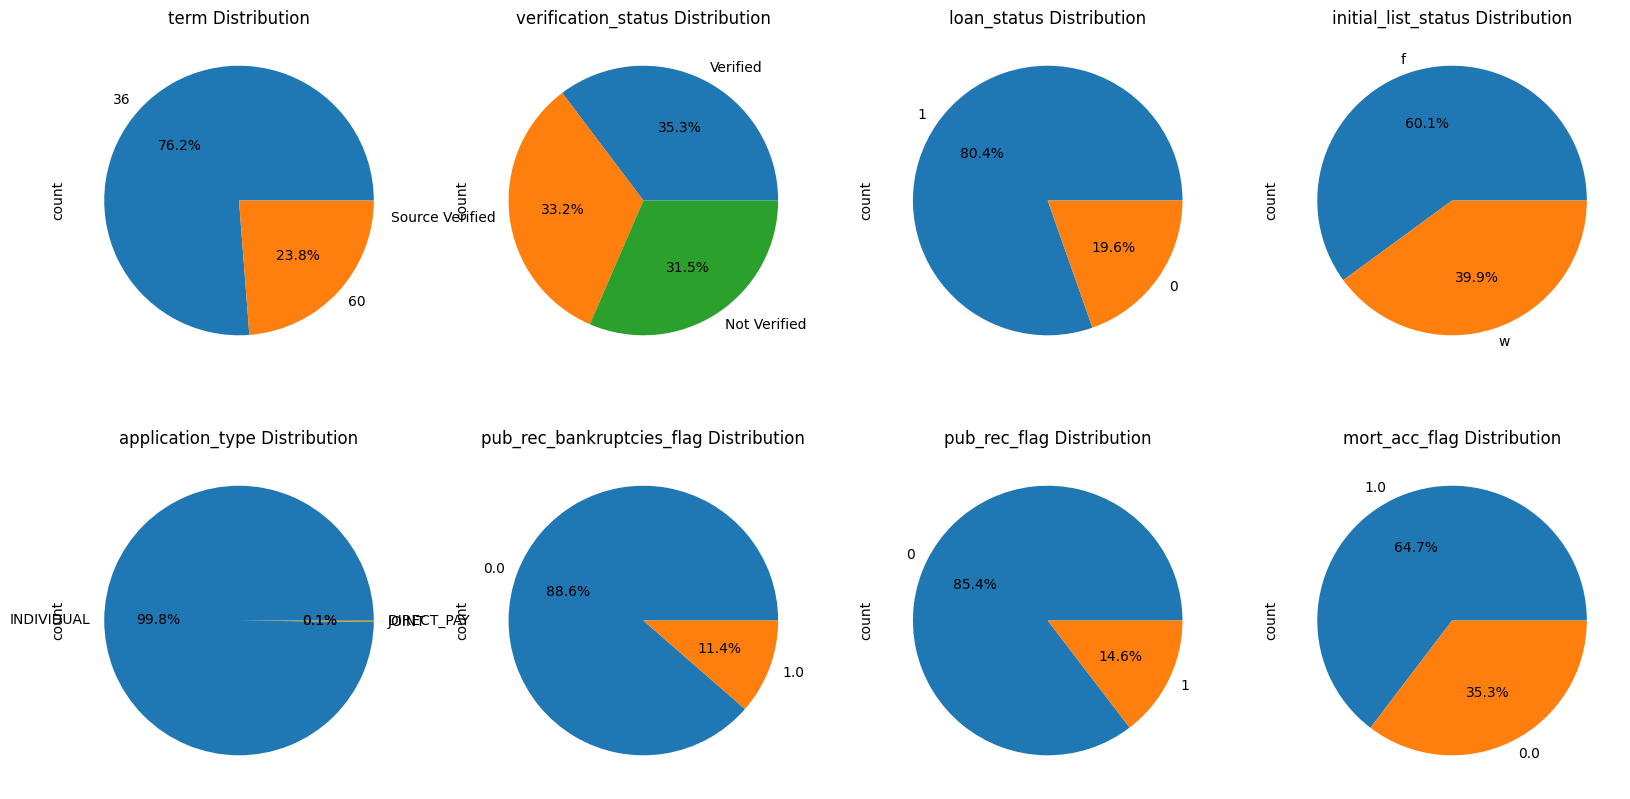

In [ ]:
# Univariate Analysis
# Pie chart for the categorical columns with less than 5 unique values 4x2 grid
cat_cols_less_5 = df.select_dtypes(include='category').columns[df.select_dtypes(include='category').nunique() <= 5]
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, column in enumerate(cat_cols_less_5):
    row = i // 4
    col = i % 4
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
plt.show()

Observations:
- Most of the loans are of 36 months term.
- Individual applicant type is dominant.
- Mostly, public records and bankruptcies are not present.
- Verification status is uniformly distributed to all the statuses.

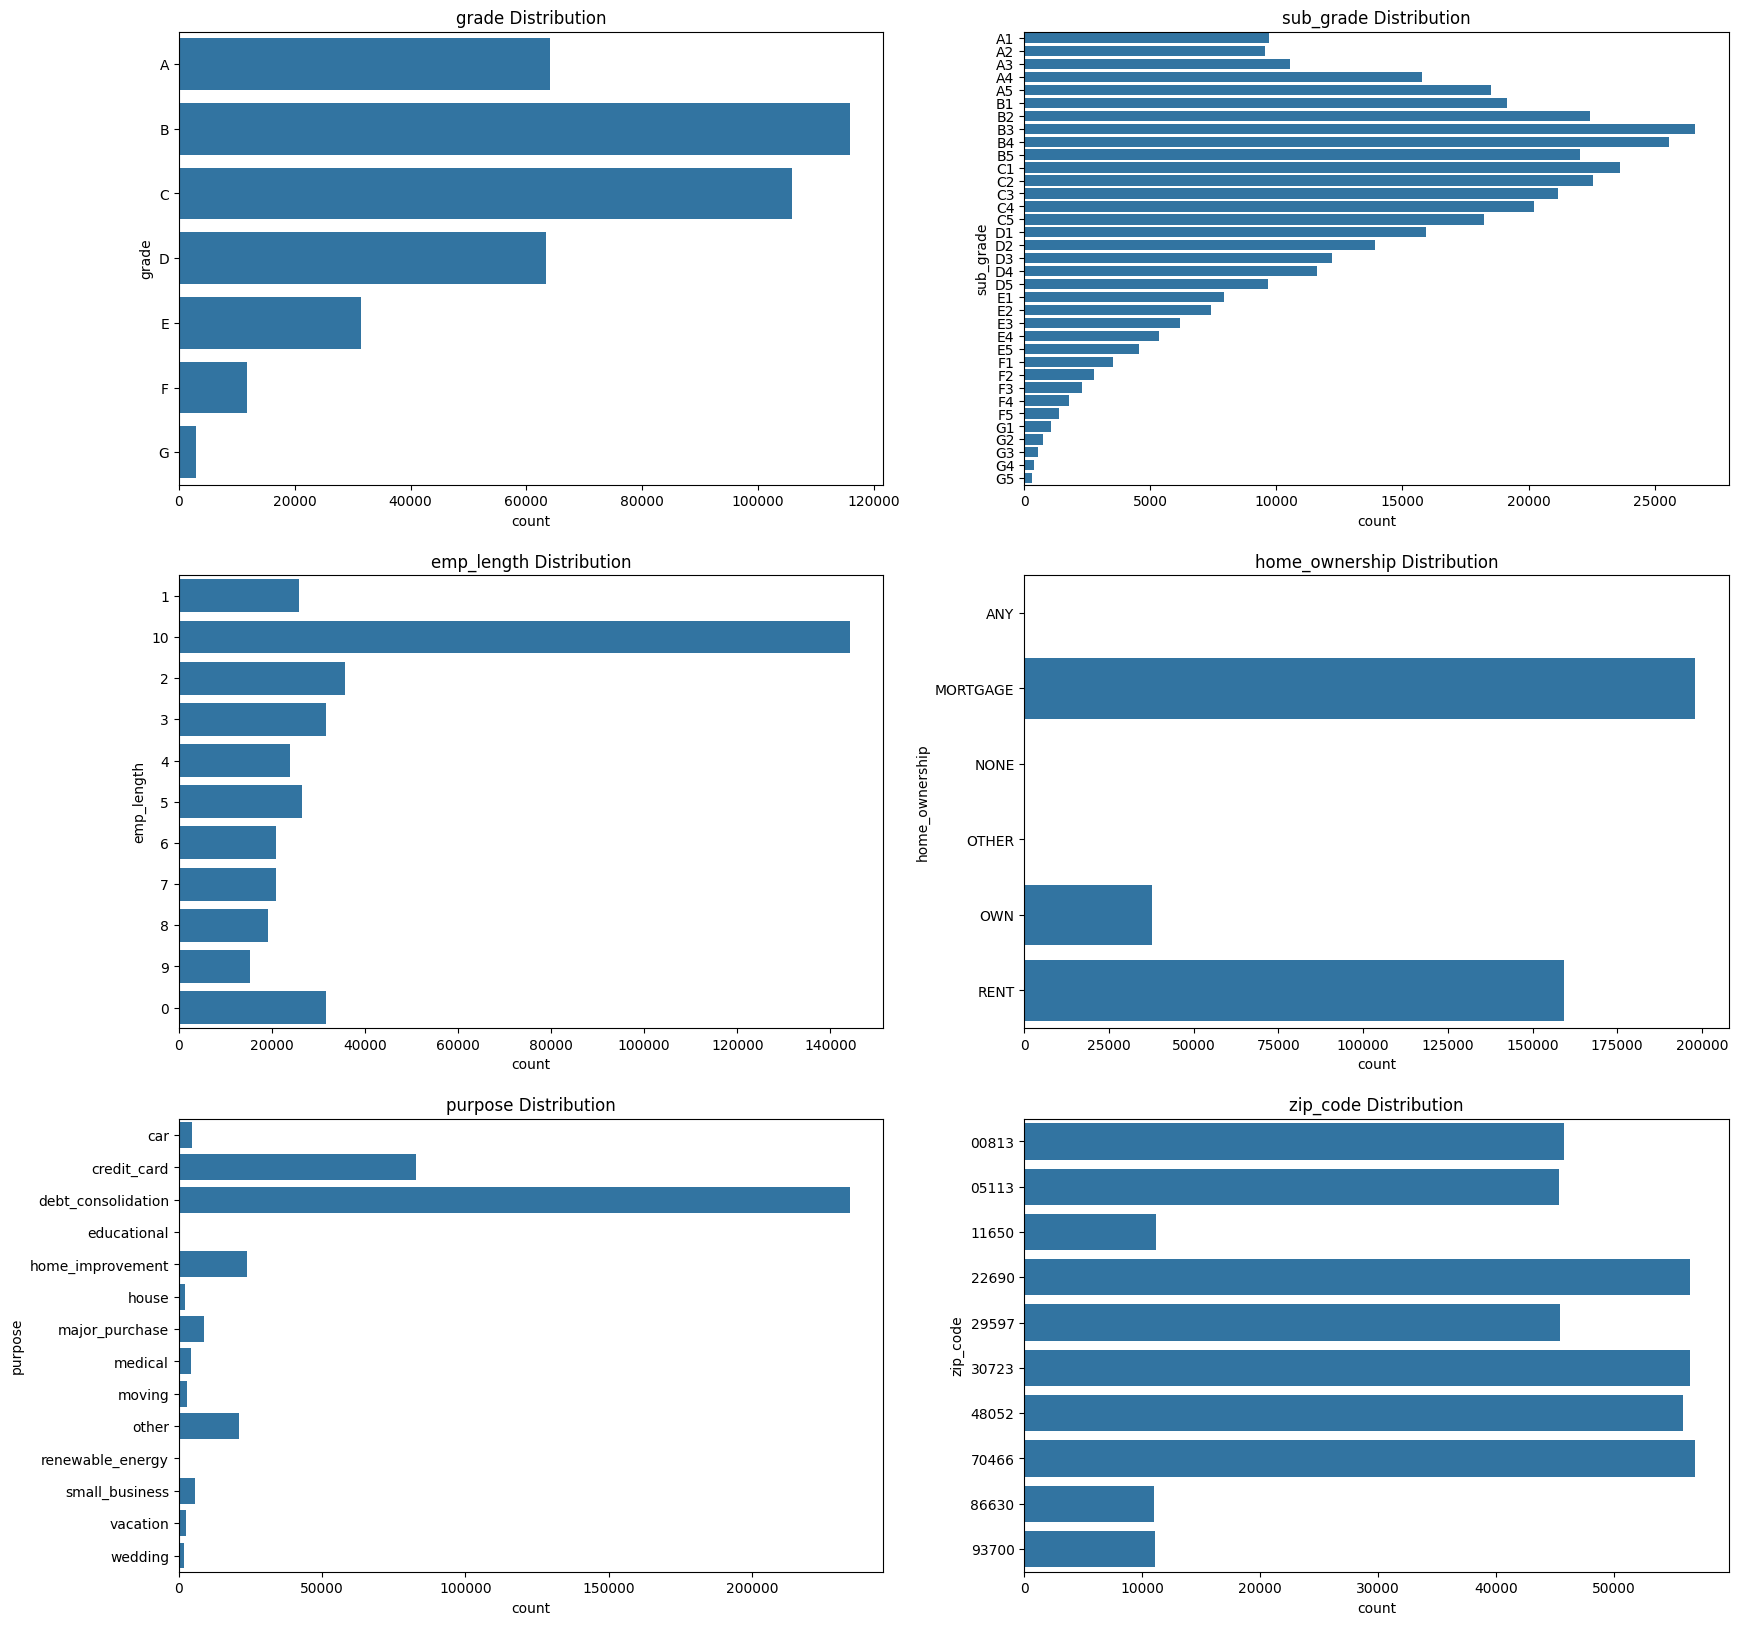

In [ ]:
# Count plot for the categorical columns with more than 5 unique values 3x2 grid
cat_cols_more_5 = df.select_dtypes(include='category').columns[df.select_dtypes(include='category').nunique() > 5]
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, column in enumerate(cat_cols_more_5):
    row = i // 2
    col = i % 2
    sns.countplot(y=column, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
plt.show()

Observations:
- Most of the loans are of grade "B".
- Most of the loans are of sub-grade "B3".
- Most of the loans are for debt consolidation.
- Zip code 70466, 48052, 30723, 22690 are the top 4 zip codes in the dataset.

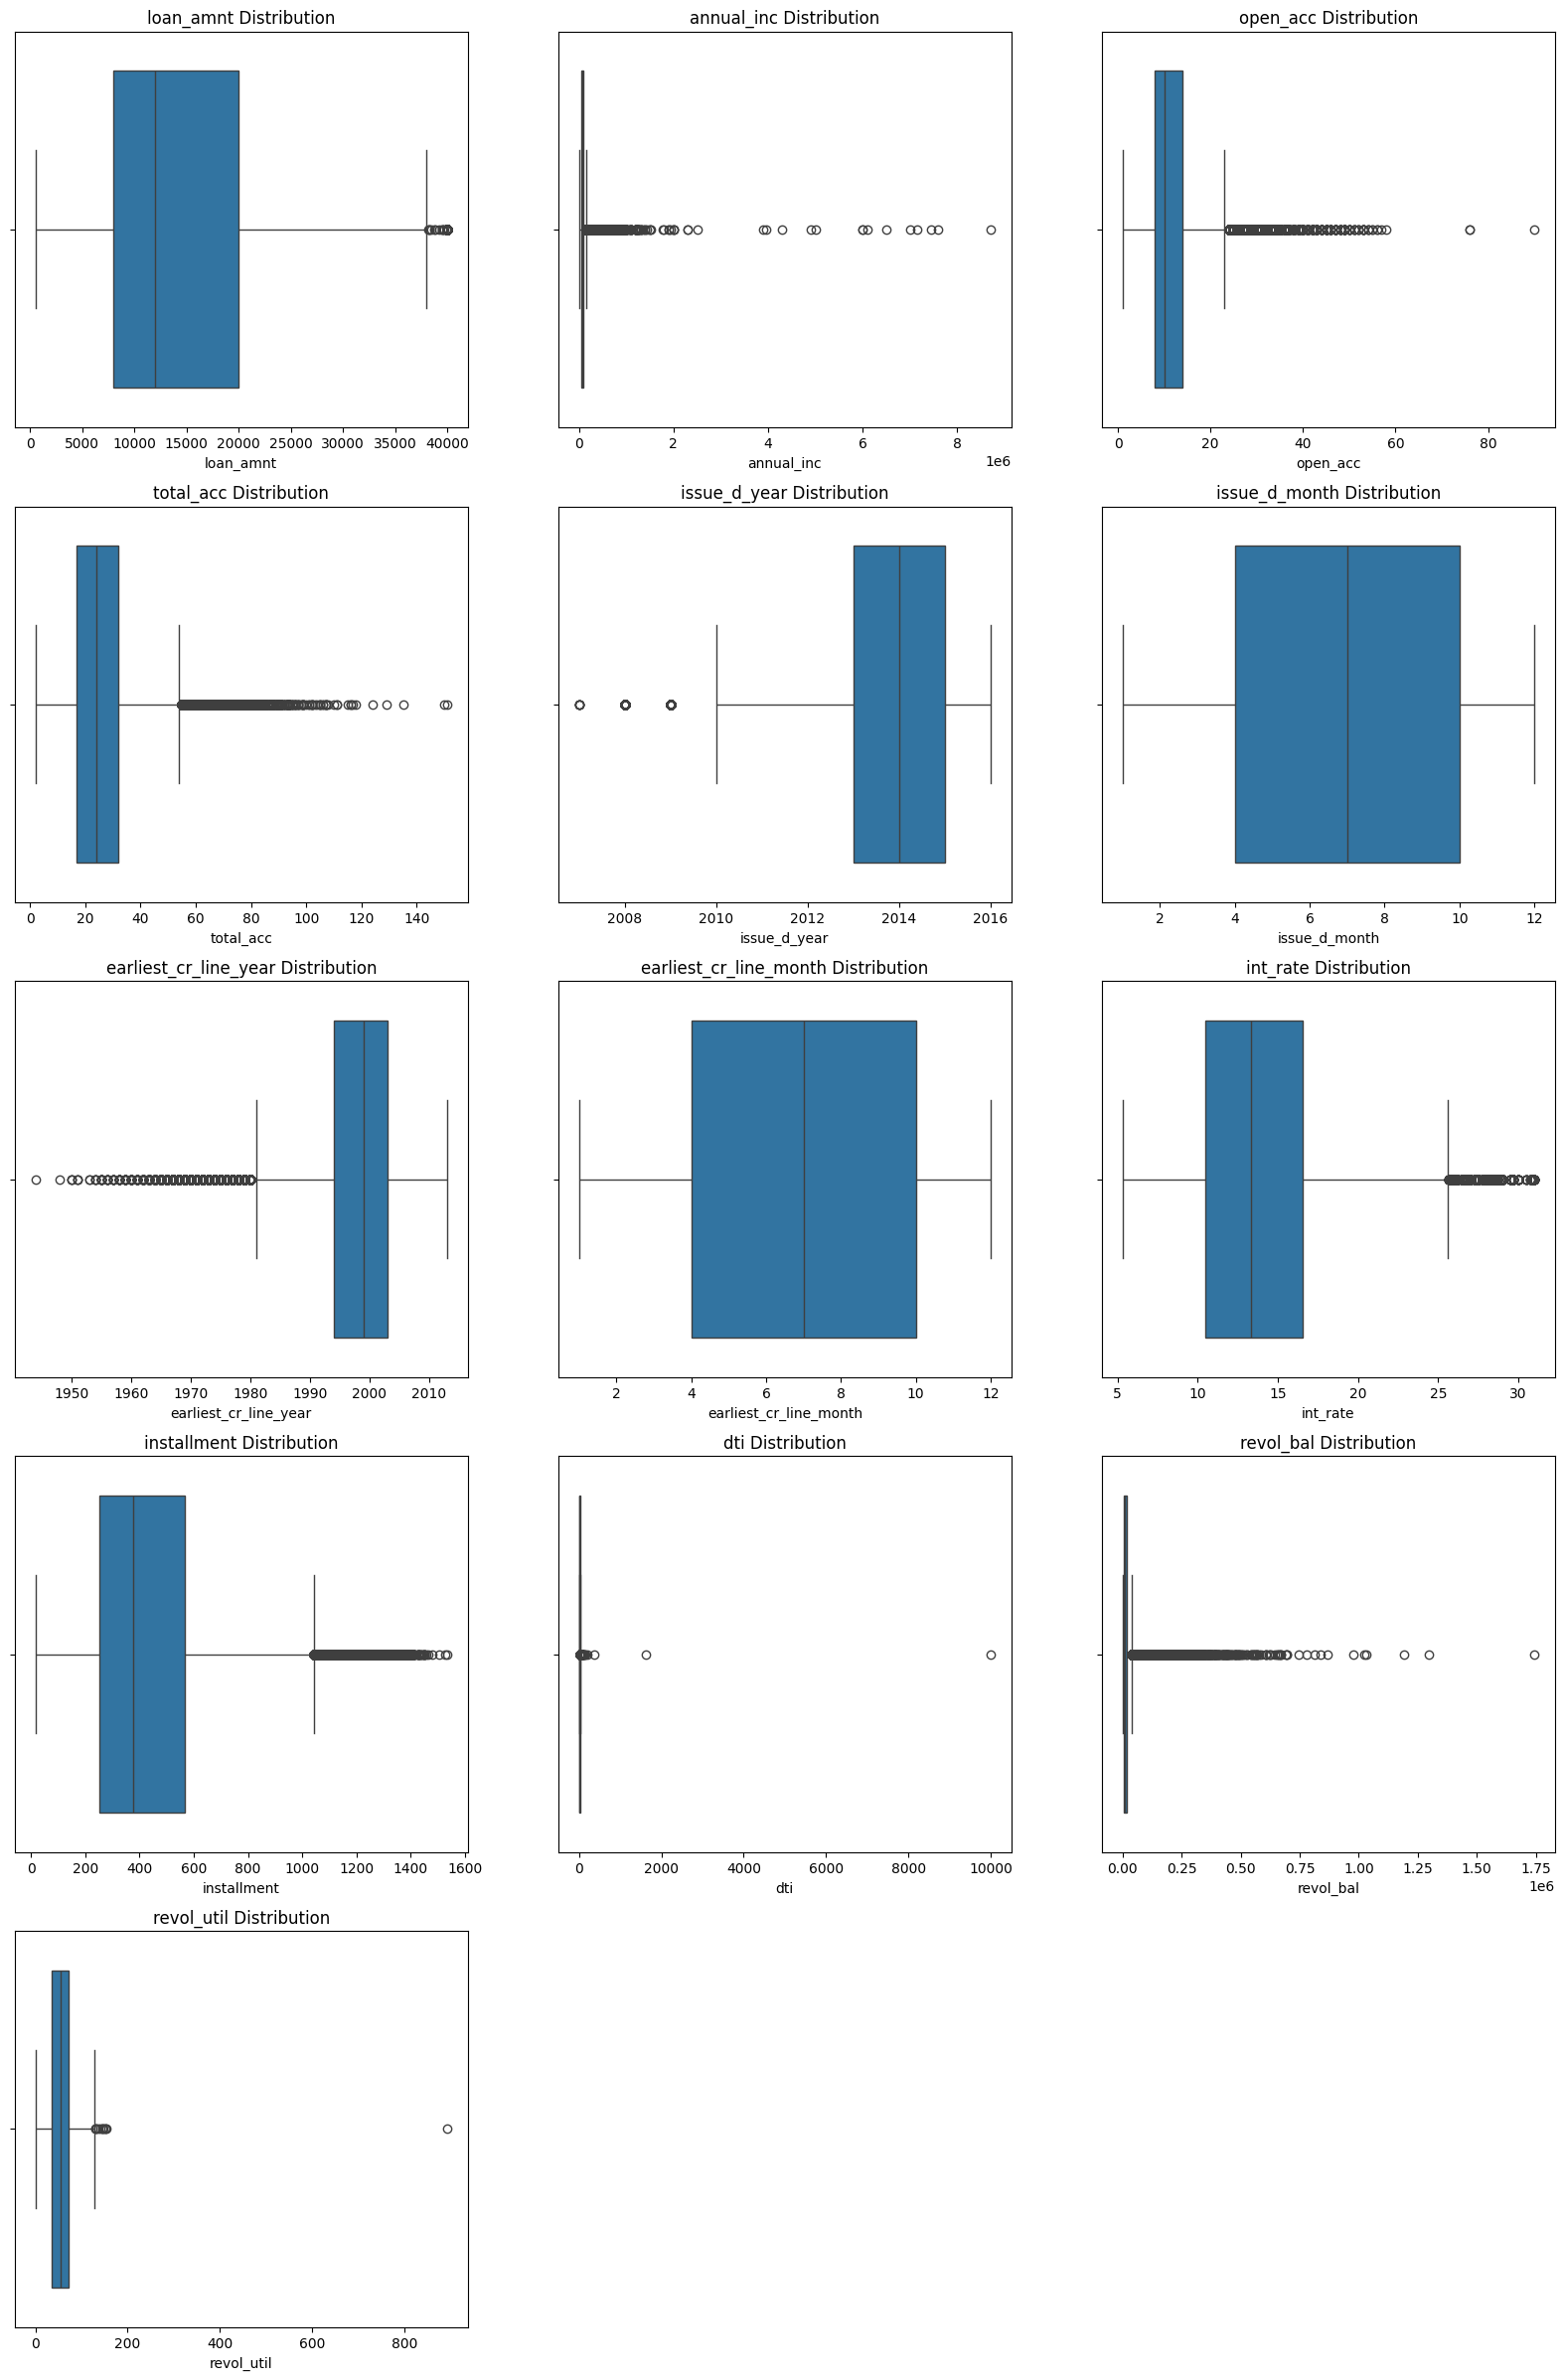

In [ ]:
# Box plot for the numeric columns
fig, ax = plt.subplots(5, 3, figsize=(20, 30))
for i, column in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    sns.boxplot(x=column, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
# Removing the empty plots
ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
plt.show()


Observations:
- There are so many outliers in the numerical columns.
- Annual income, DTI, Revolving balance, Revolving utilization are affected extremely by the outliers.

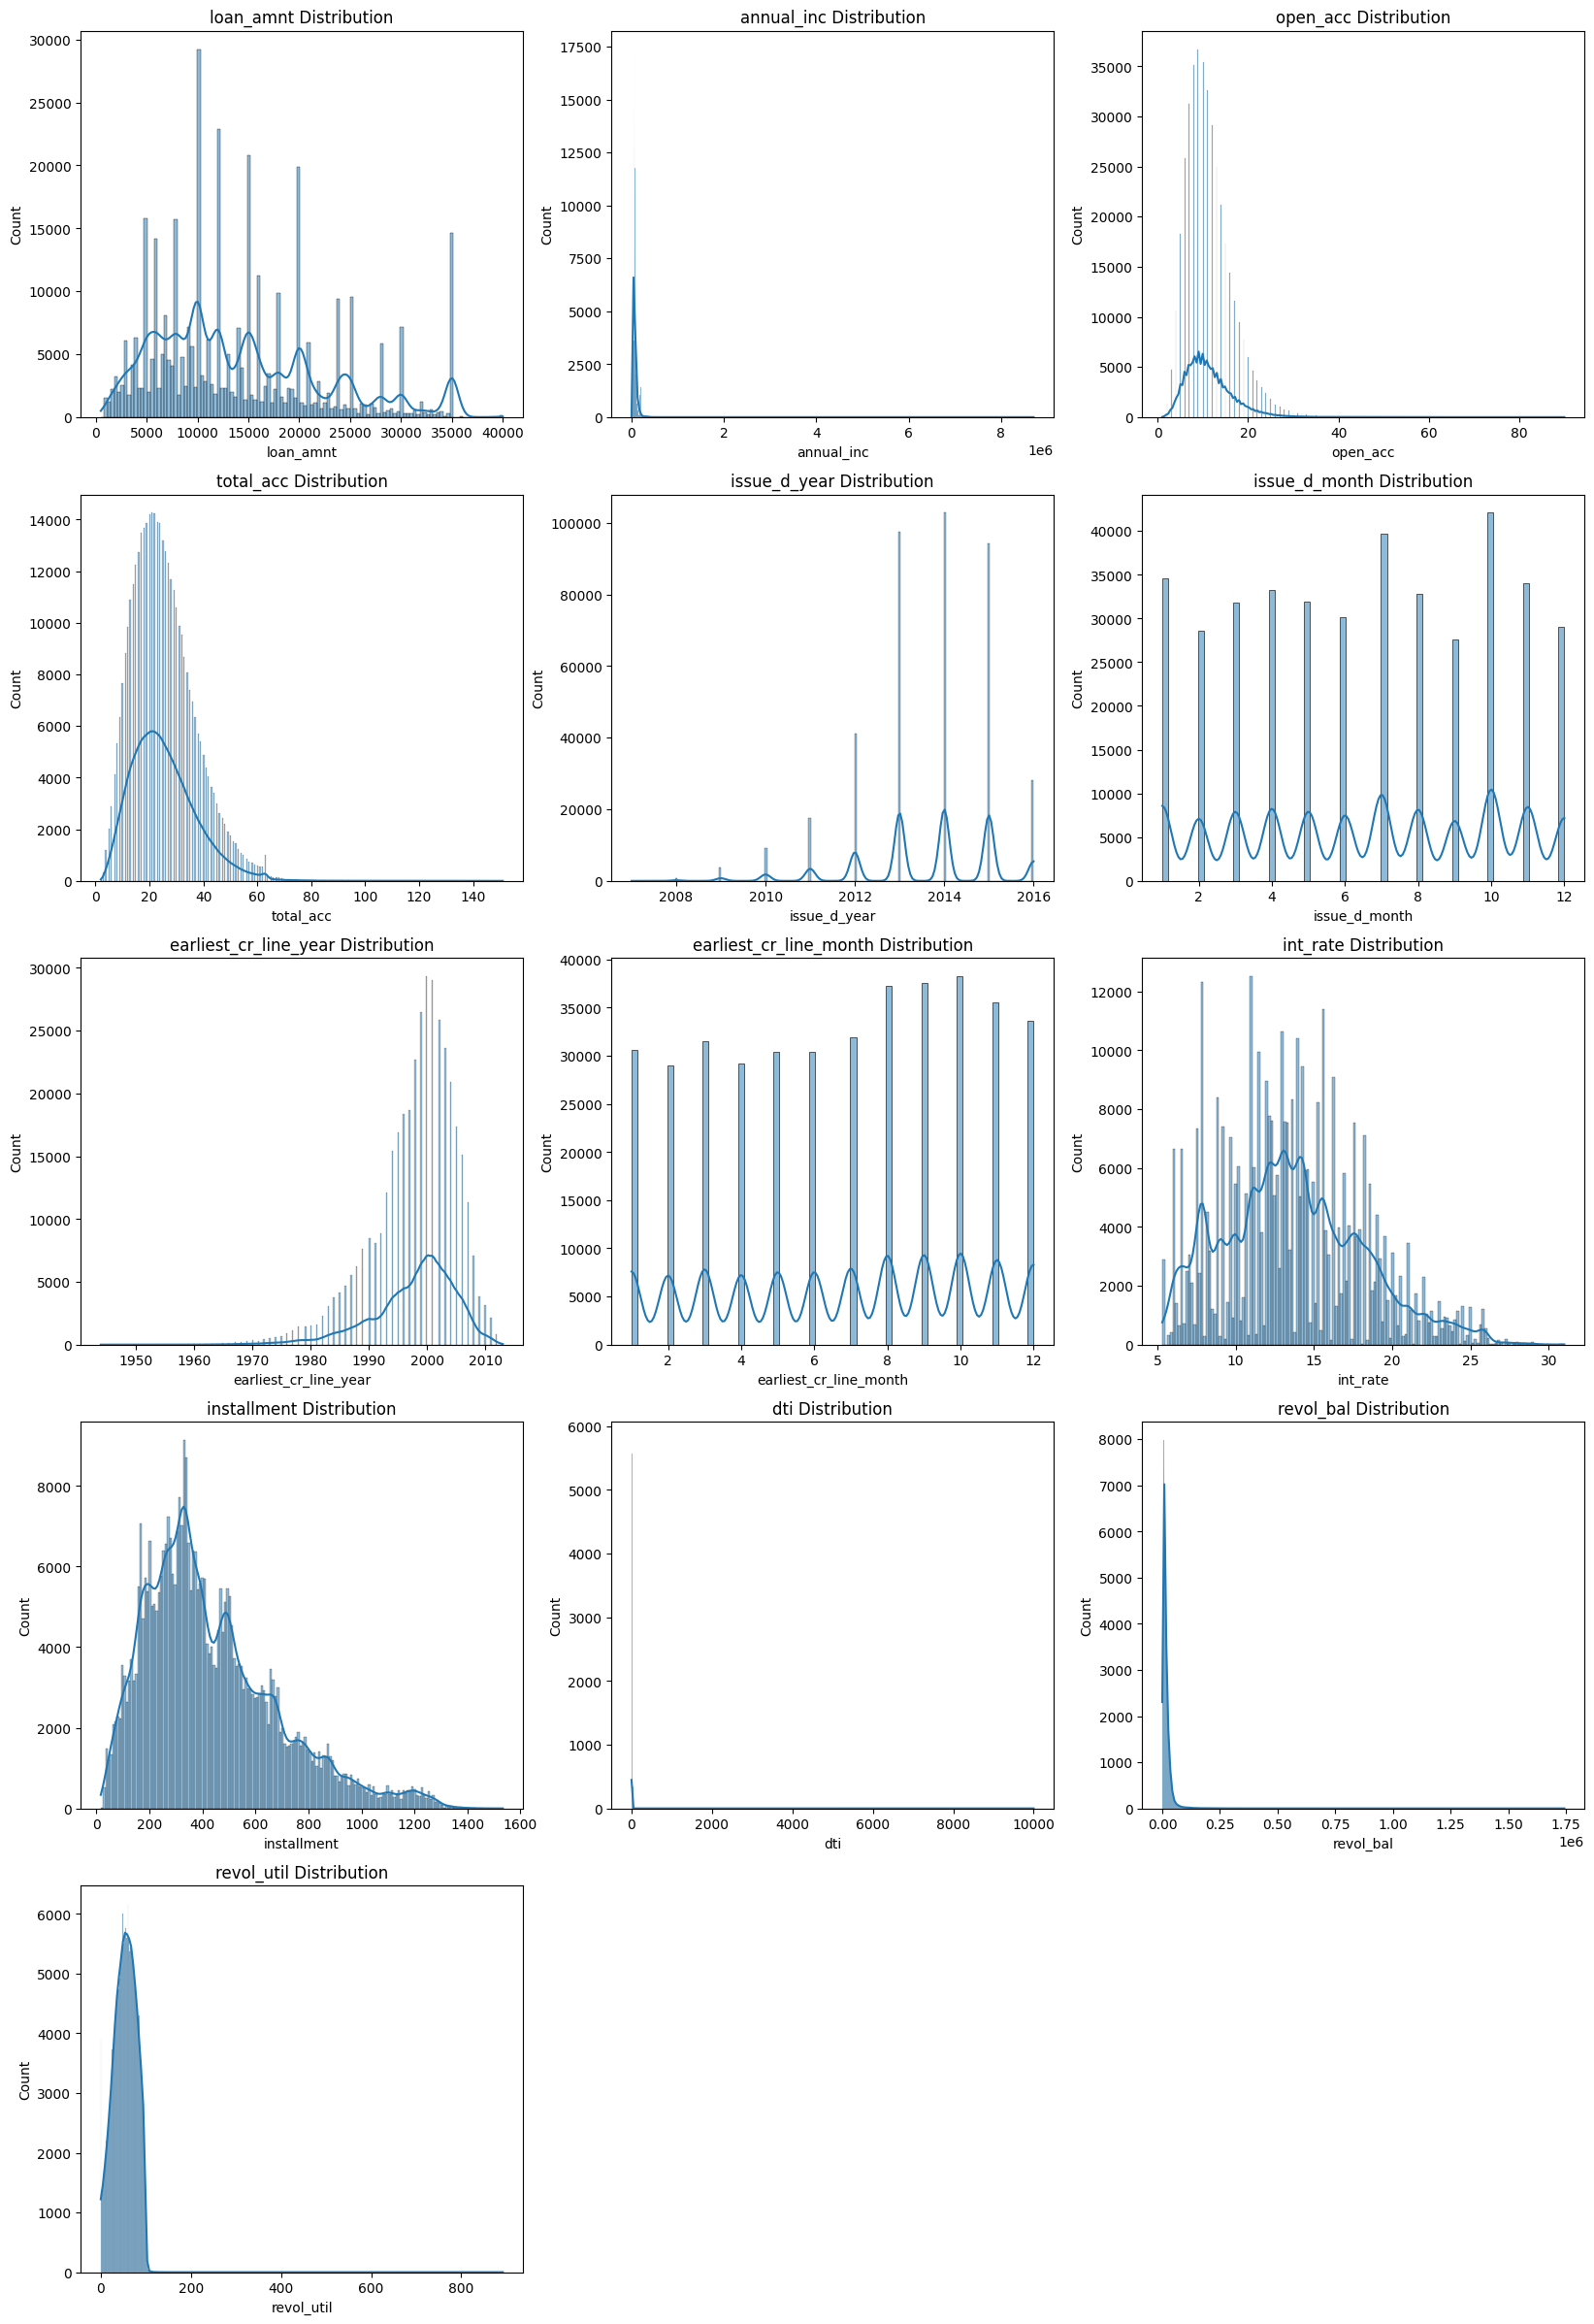

In [ ]:
# Histogram with KDE for the numeric columns
fig, ax = plt.subplots(5, 3, figsize=(20, 30))
for i, column in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], kde=True, ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
# Removing the empty plots
ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
plt.show()

Observations:
- Most of the numerical columns are not normally distributed.
- The columns loan_amnt, installment, annual_inc, dti, revol_bal, revol_util are right-skewed.

### Bivariate Analysis:

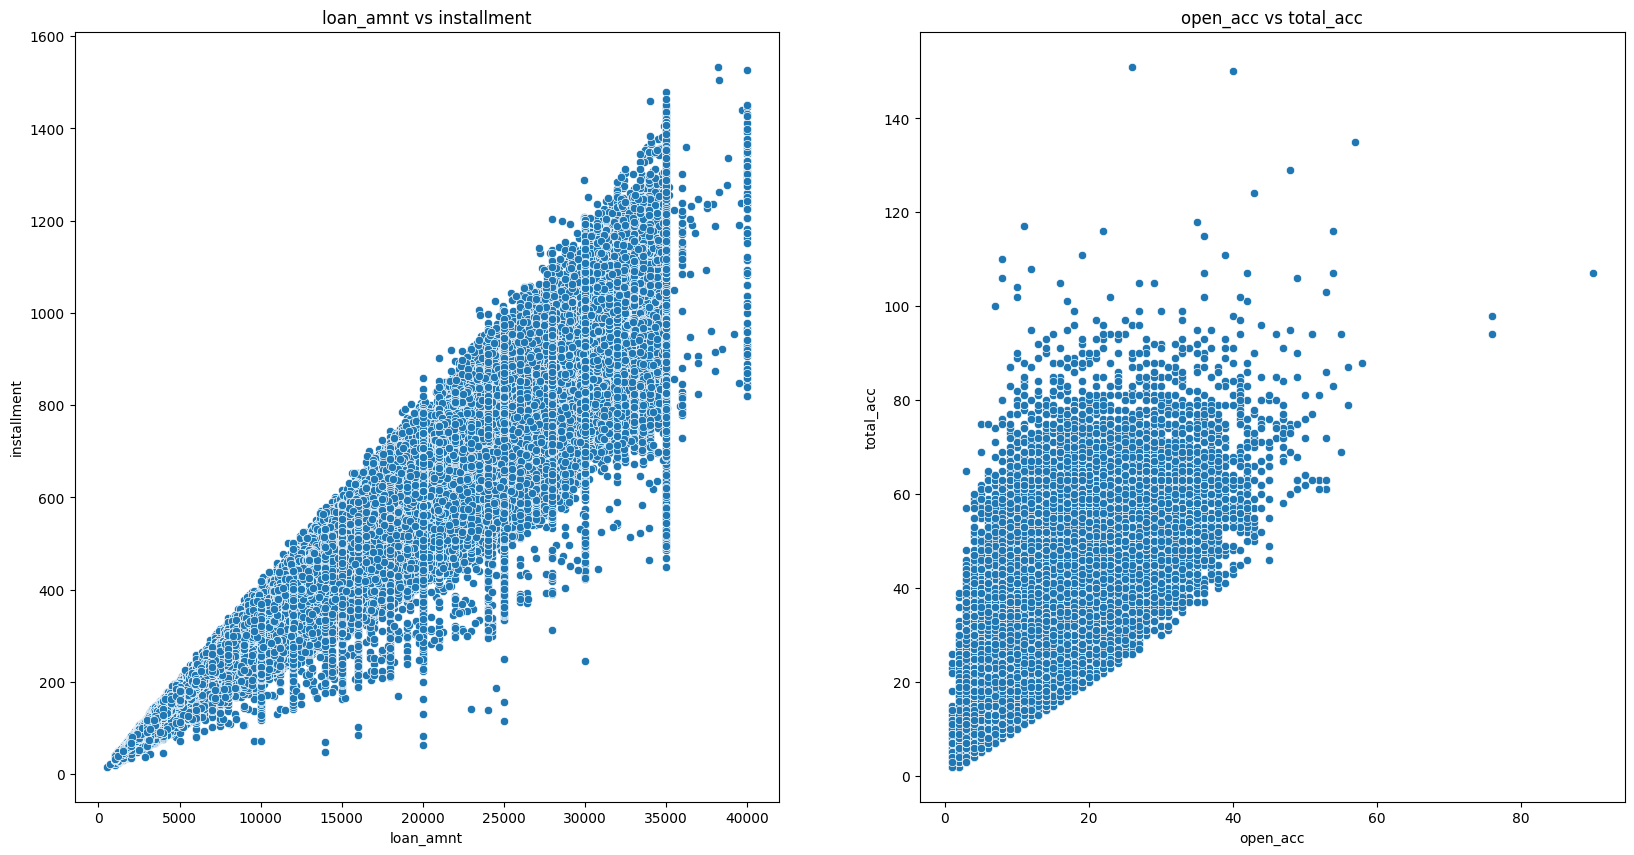

In [ ]:
# Scatter plot for loan_amnt vs installment and open_acc vs total_acc
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x='loan_amnt', y='installment', data=df, ax=ax[0])
ax[0].set_title('loan_amnt vs installment')
sns.scatterplot(x='open_acc', y='total_acc', data=df, ax=ax[1])
ax[1].set_title('open_acc vs total_acc')
plt.show()

Observations:
- The loan amount is highly correlated with the installment.
- Likewise, the open accounts are highly correlated with the total accounts.

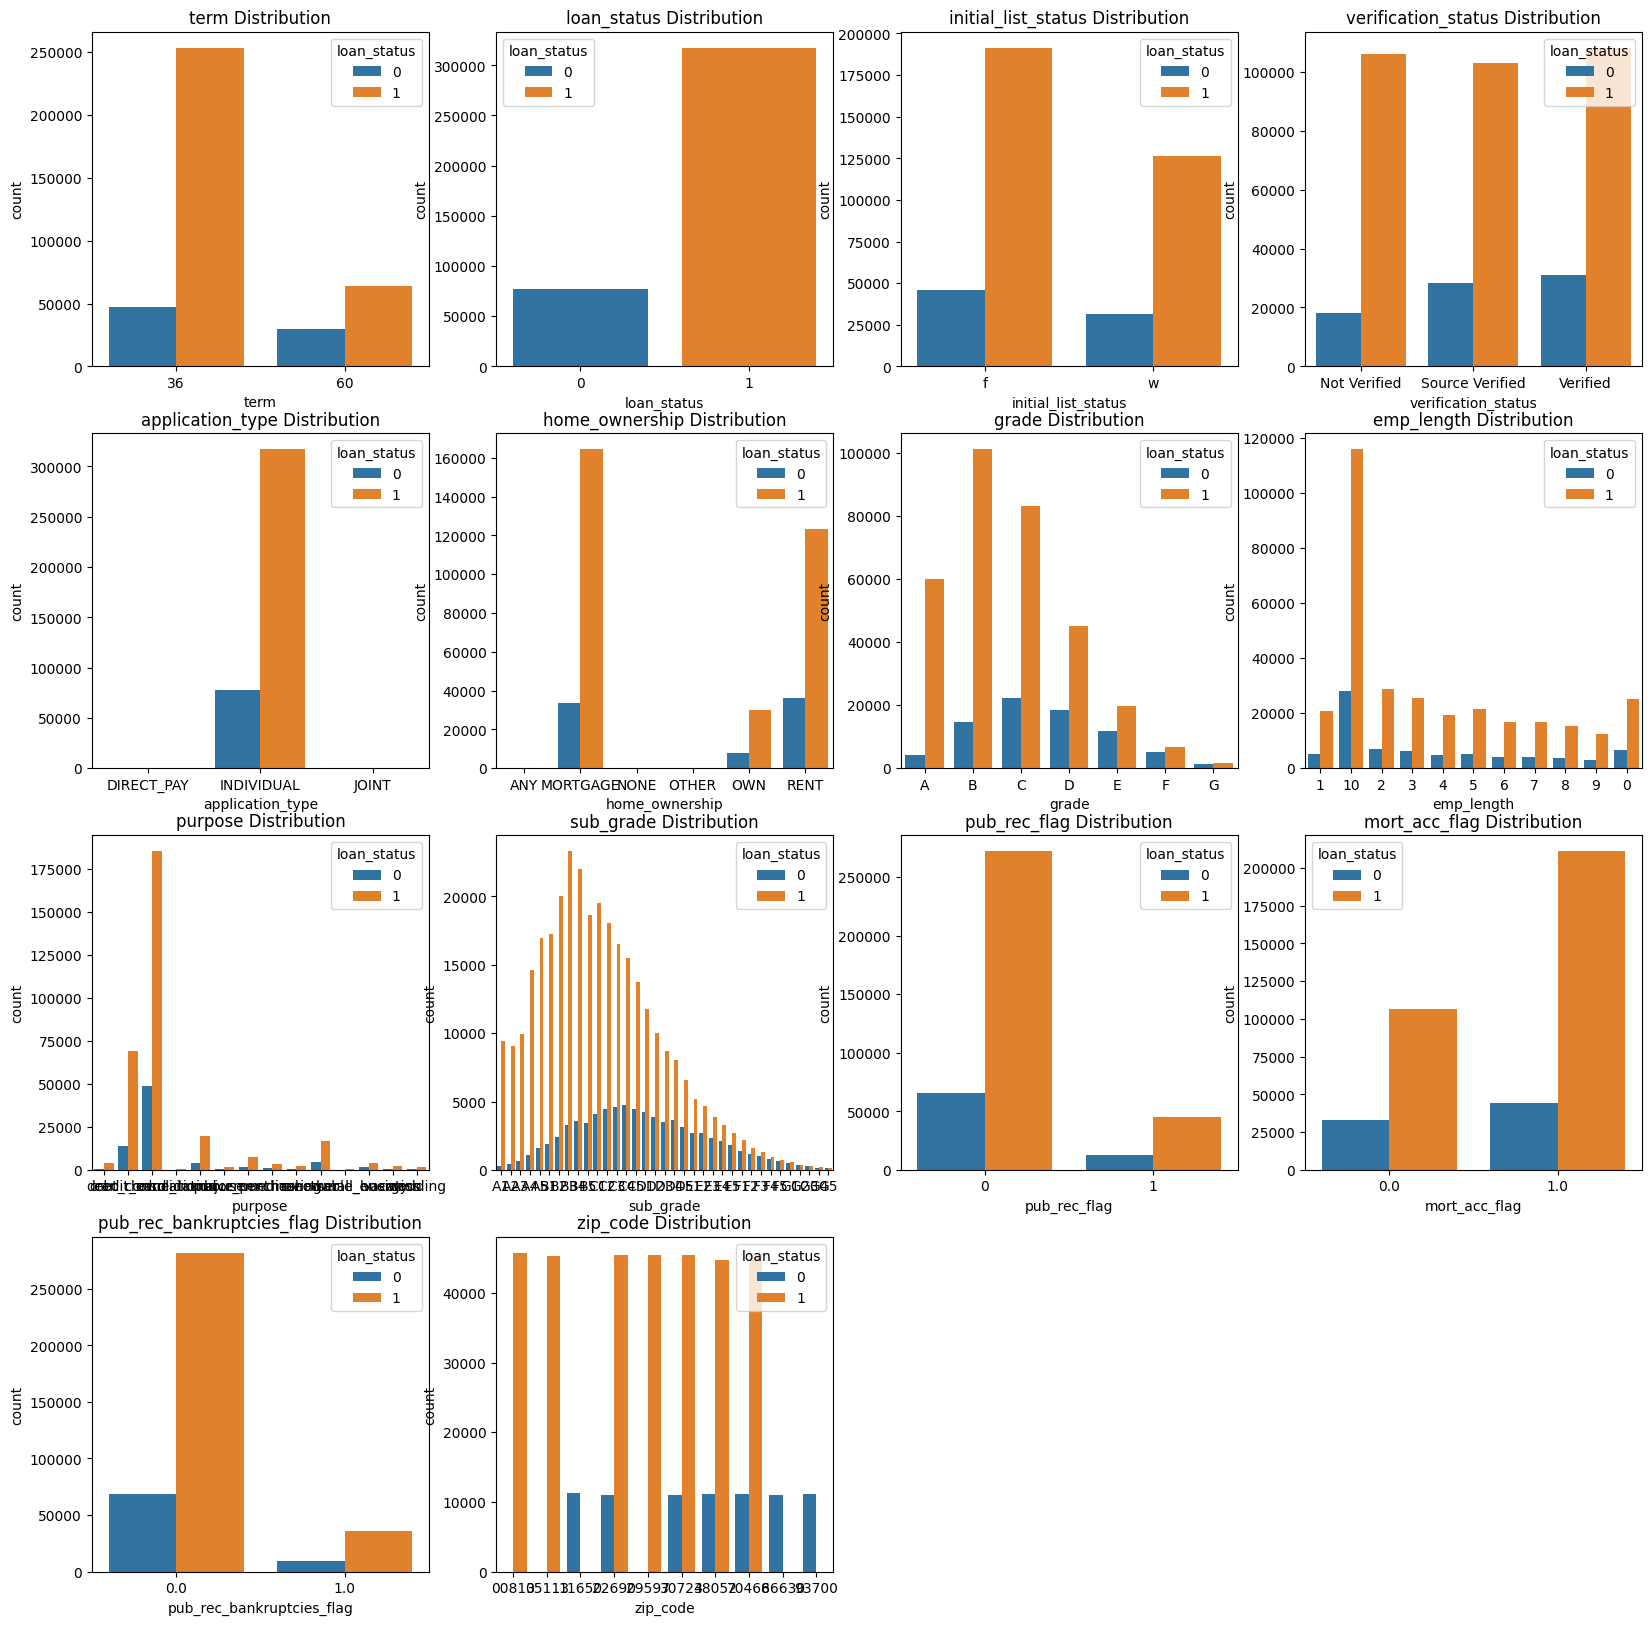

In [ ]:
# loan_status vs categorical columns
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i, column in enumerate(cat_cols):
    row = i // 4
    col = i % 4
    sns.countplot(x=column, data=df, hue='loan_status', ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
# Removing the empty plots
ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
plt.show()

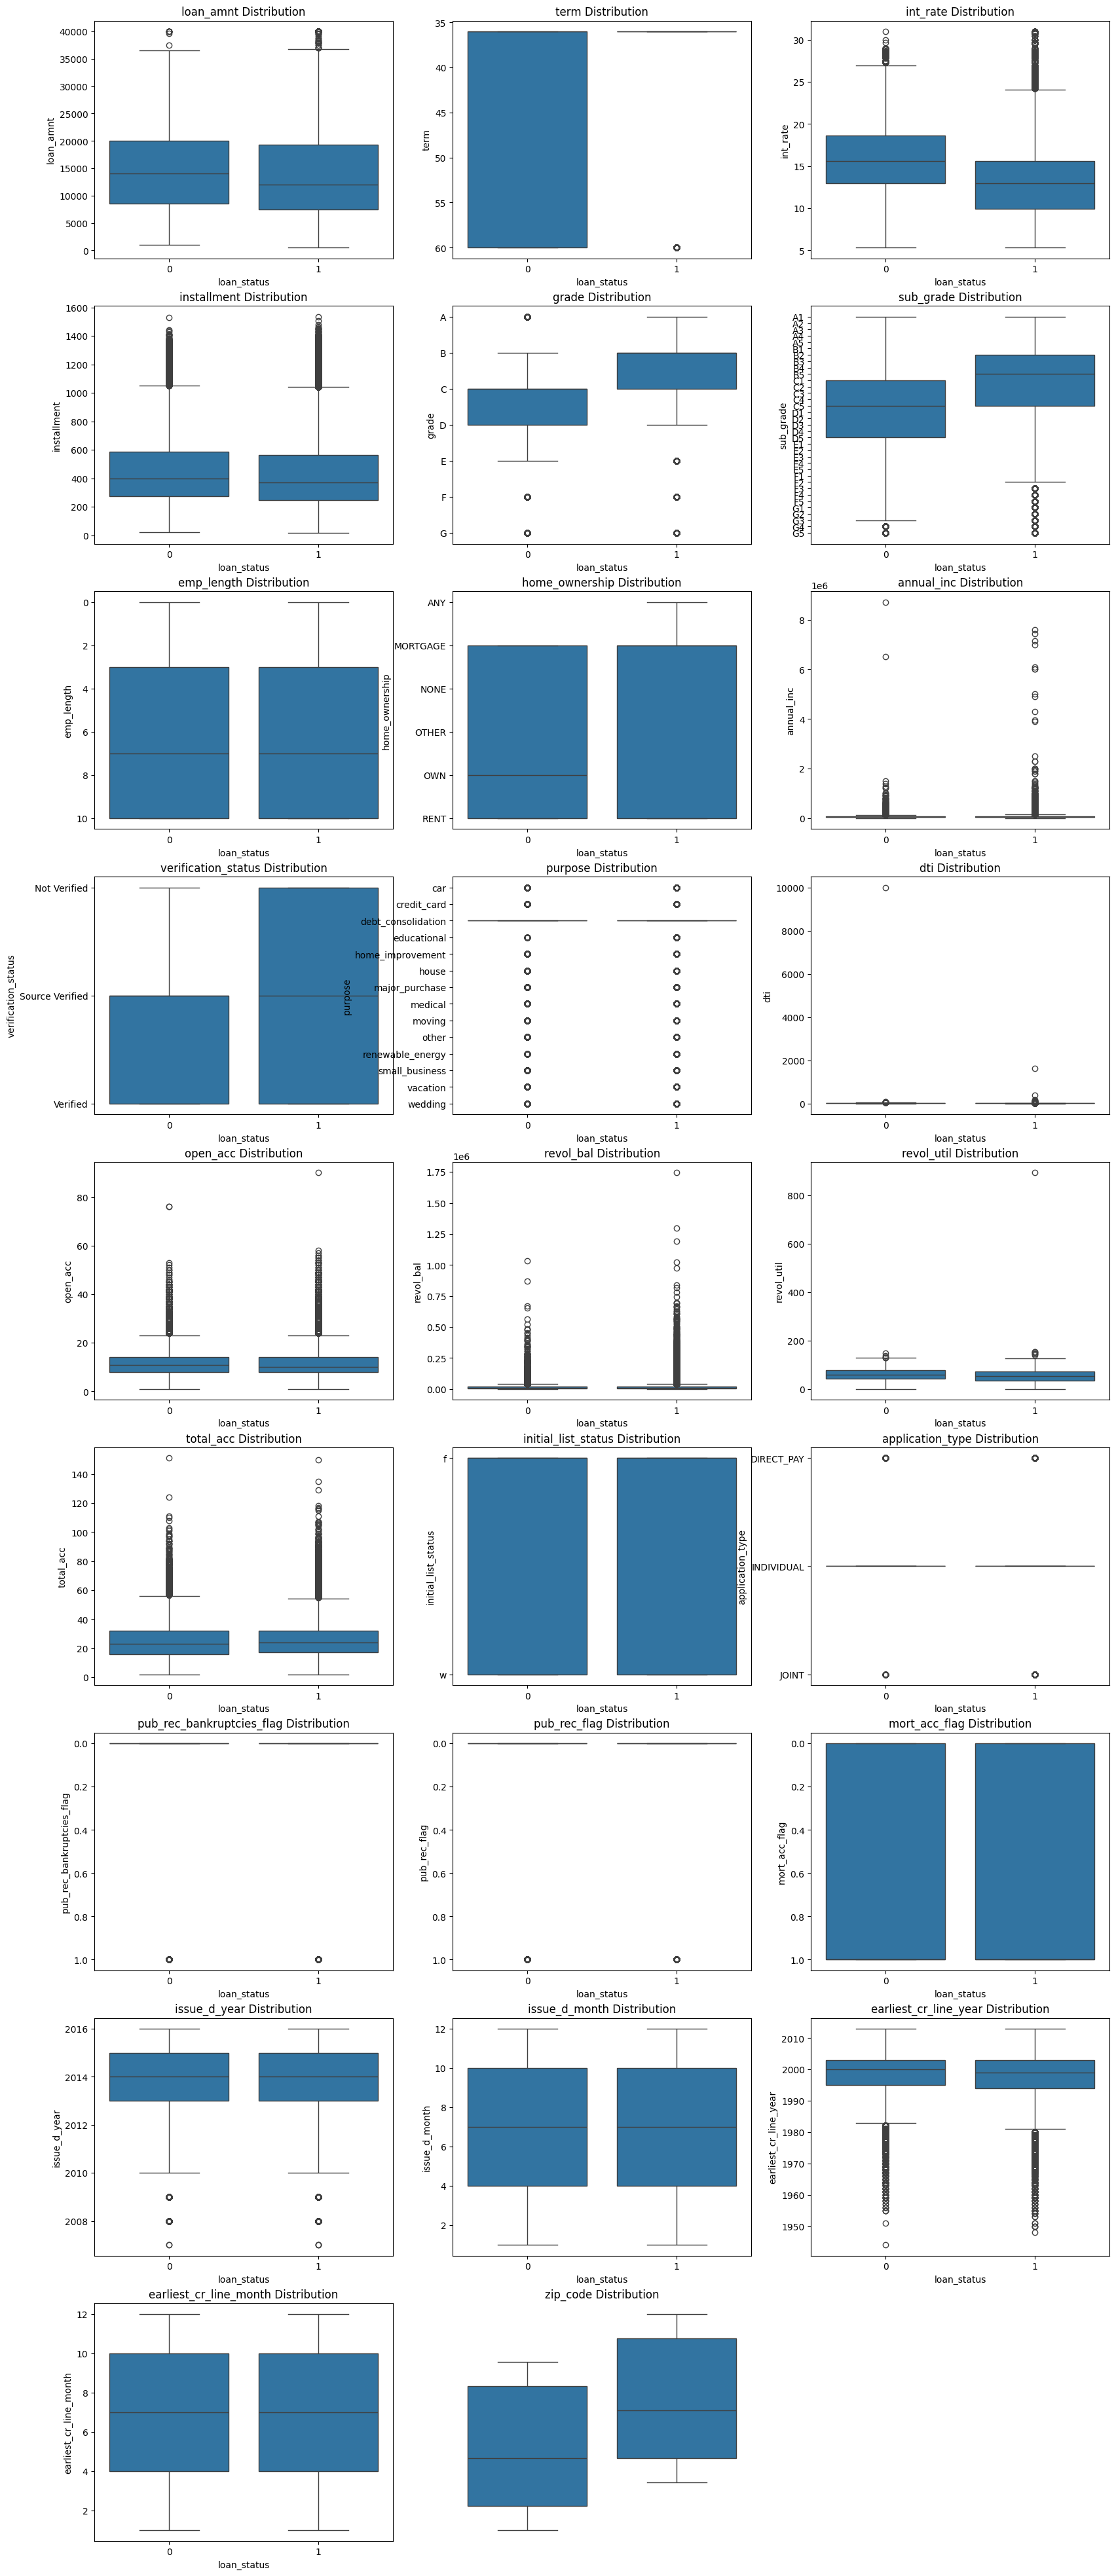

In [ ]:
# Box plot for loan_status vs all the columns
fig, ax = plt.subplots(9, 3, figsize=(20, 50))
arr = df.columns.drop('loan_status')
for i, column in enumerate(arr):
    row = i // 3
    col = i % 3
    sns.boxplot(x='loan_status', y=column, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
# Removing the empty plots
ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
plt.show()

Observations:
- The box plot shows that there are more outliers irrespective of the loan status.

### Multivariate Analysis:

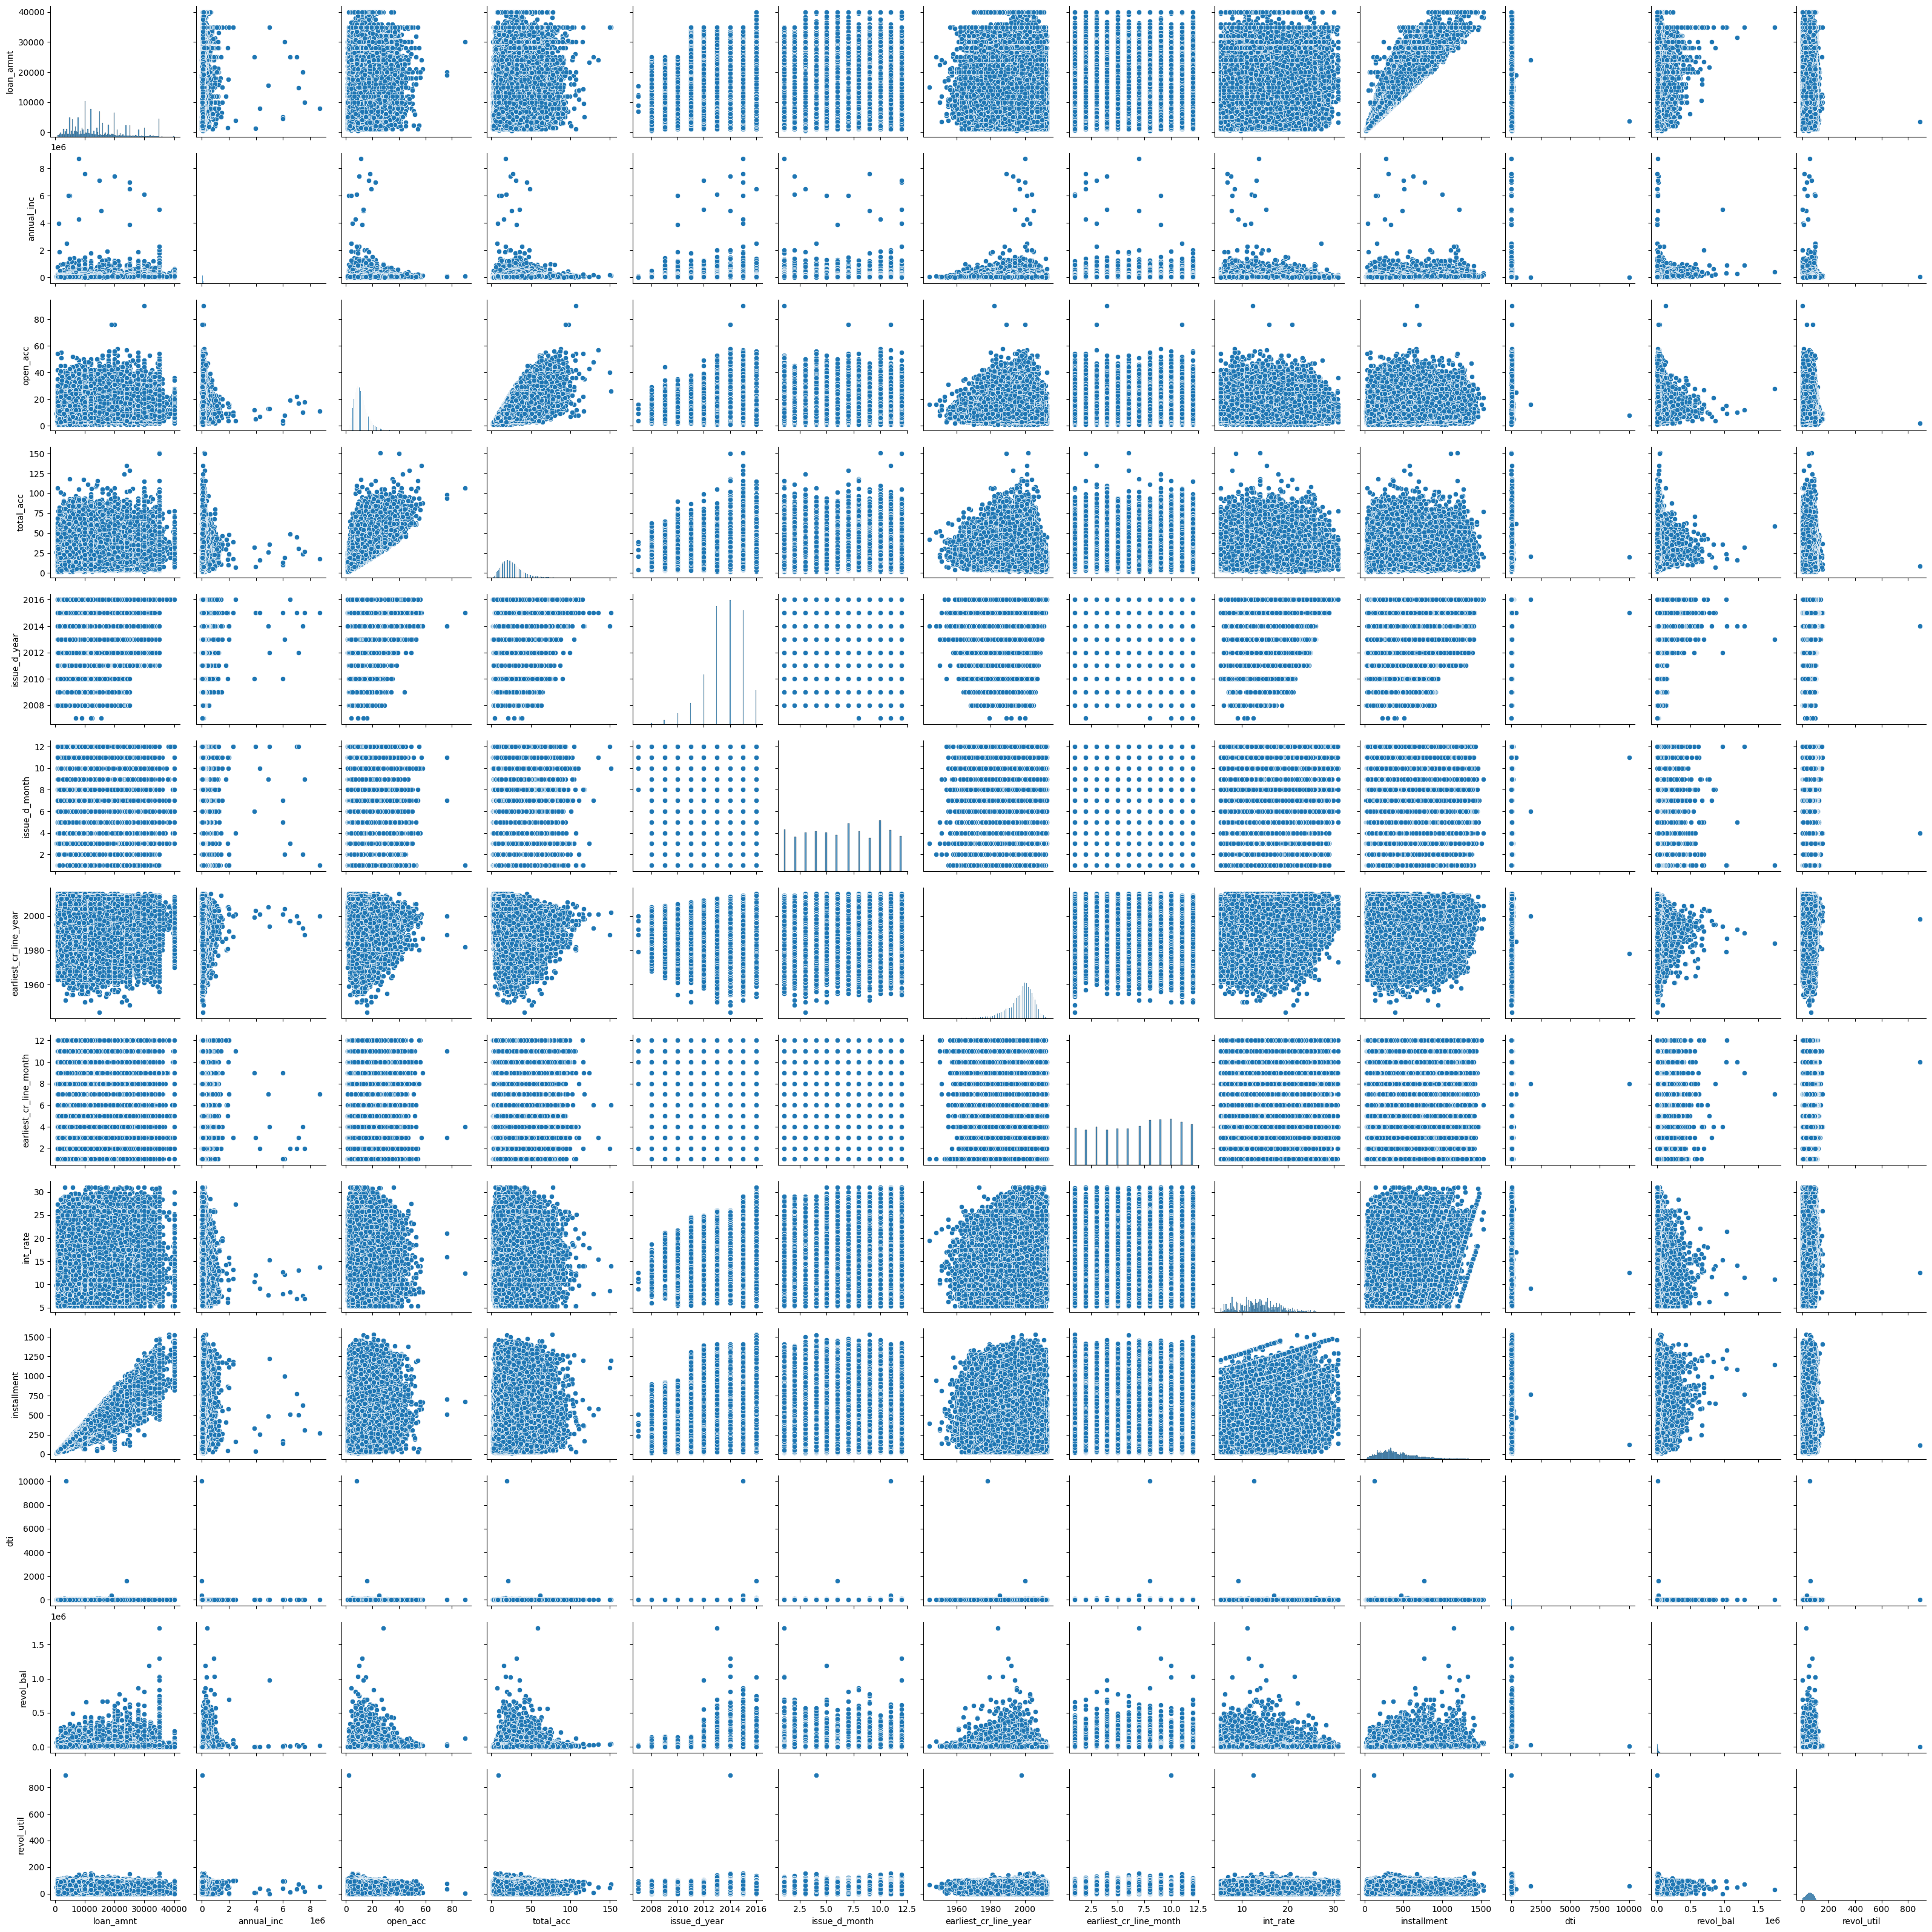

In [ ]:
# Pair plot for the numeric columns
sns.pairplot(df[numeric_cols])

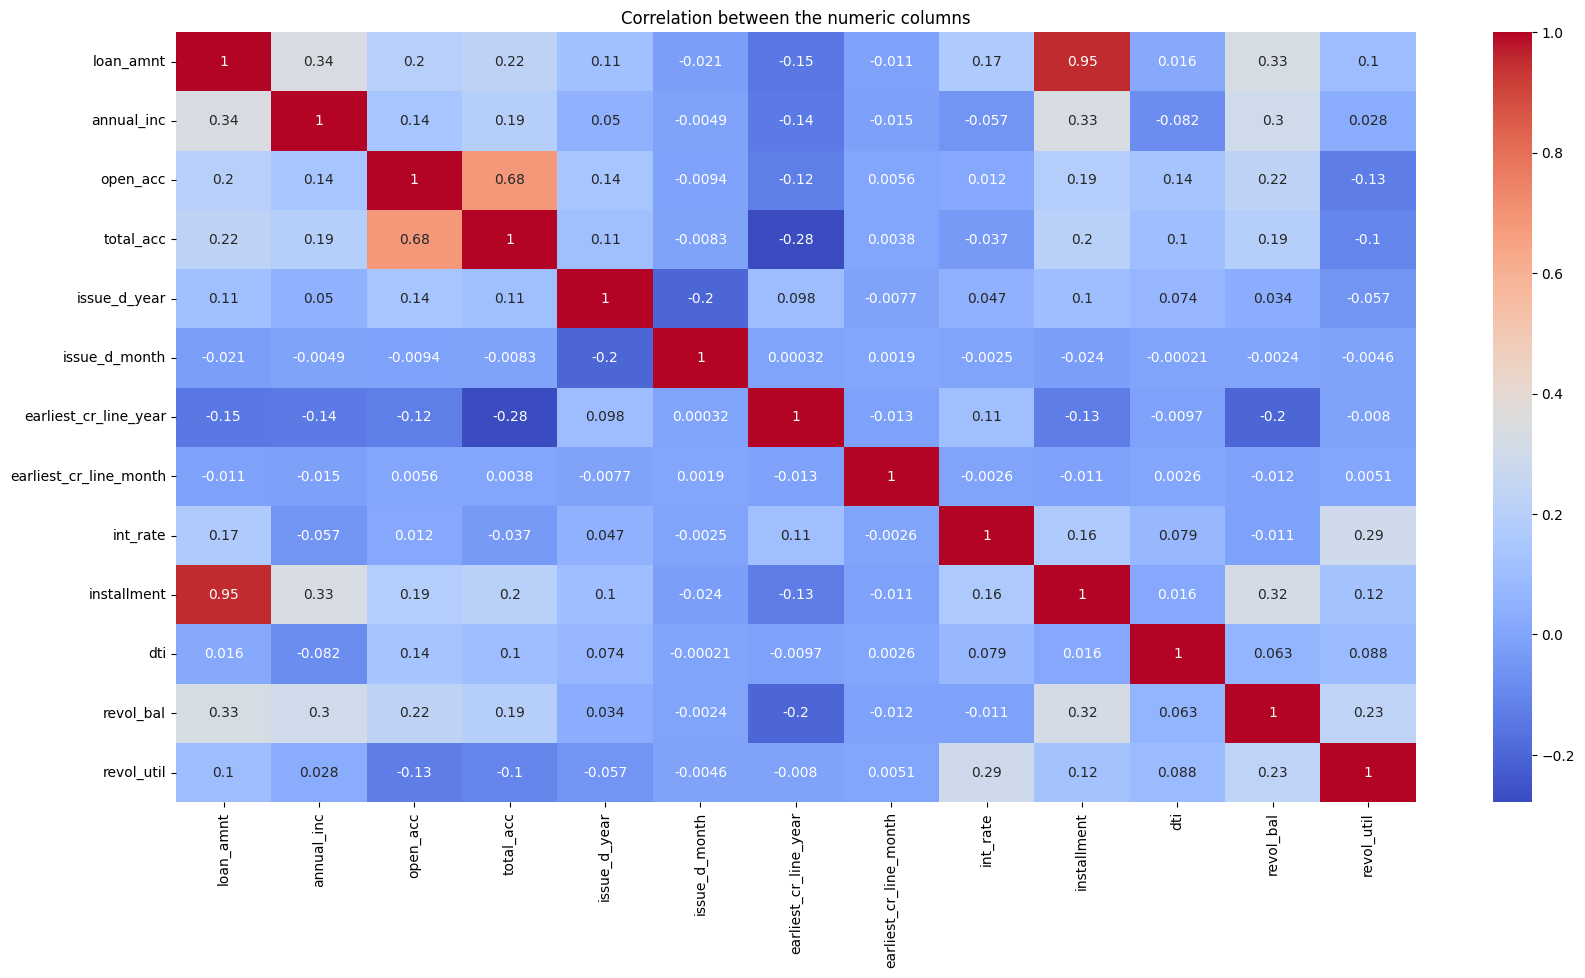

In [ ]:
# Heatmap for the correlation between the numeric columns
plt.figure(figsize=(20, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the numeric columns')
plt.show()

Observations:
- From the heatmap and pairplot, we can see that the installment and loan amount are highly correlated. Hence, we can drop one of the columns.

## Outlier Treatment:

In [ ]:
# Get the percentage of outliers in the numeric columns
outliers = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = [df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]/df.shape[0]*100]
outliers.index = ['Percentage of Outliers']
outliers.T

Percentage of Outliers
loan_amnt                             0.048075
annual_inc                            4.212601
open_acc                              2.605391
total_acc                             2.148429
issue_d_year                          1.190985
issue_d_month                         0.000000
earliest_cr_line_year                 2.683322
earliest_cr_line_month                0.000000
int_rate                              0.795508
installment                           2.812112
dti                                   0.069582
revol_bal                             5.365380
revol_util                            0.003036

In [ ]:
df_copy = df.copy()
before_rows = df_copy.shape[0]
print(f'Before removing the outliers: {before_rows}')
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
after_rows = df_copy.shape[0]
print(f'After removing the outliers: {after_rows}')
print(f'Percentage of rows removed: {((before_rows - after_rows)/before_rows)*100}')

Before removing the outliers: 395219
After removing the outliers: 317300
Percentage of rows removed: 19.715398298158743


Observations:
- Here, nearly 20% of the data is considered as outliers.
- So, we can't remove the outliers.

In [ ]:
# Outlier Treatment using log transformation
for col in numeric_cols:
    df[col] = np.log1p(df[col])

In [ ]:
# Setting hard limits for the appropriate columns after log transformation
df['revol_util'] = df['revol_util'].clip(0, 100)
df['dti'] = df['dti'].clip(0, 100)

In [ ]:
# Cap the outliers with the 95th percentile and 25th percentile
for col in numeric_cols:
    percentile_95 = df[col].quantile(0.95)
    percentile_25 = df[col].quantile(0.25)
    df[col] = df[col].apply(lambda x: percentile_95 if x > percentile_95 else x)
    df[col] = df[col].apply(lambda x: percentile_25 if x < percentile_25 else x)

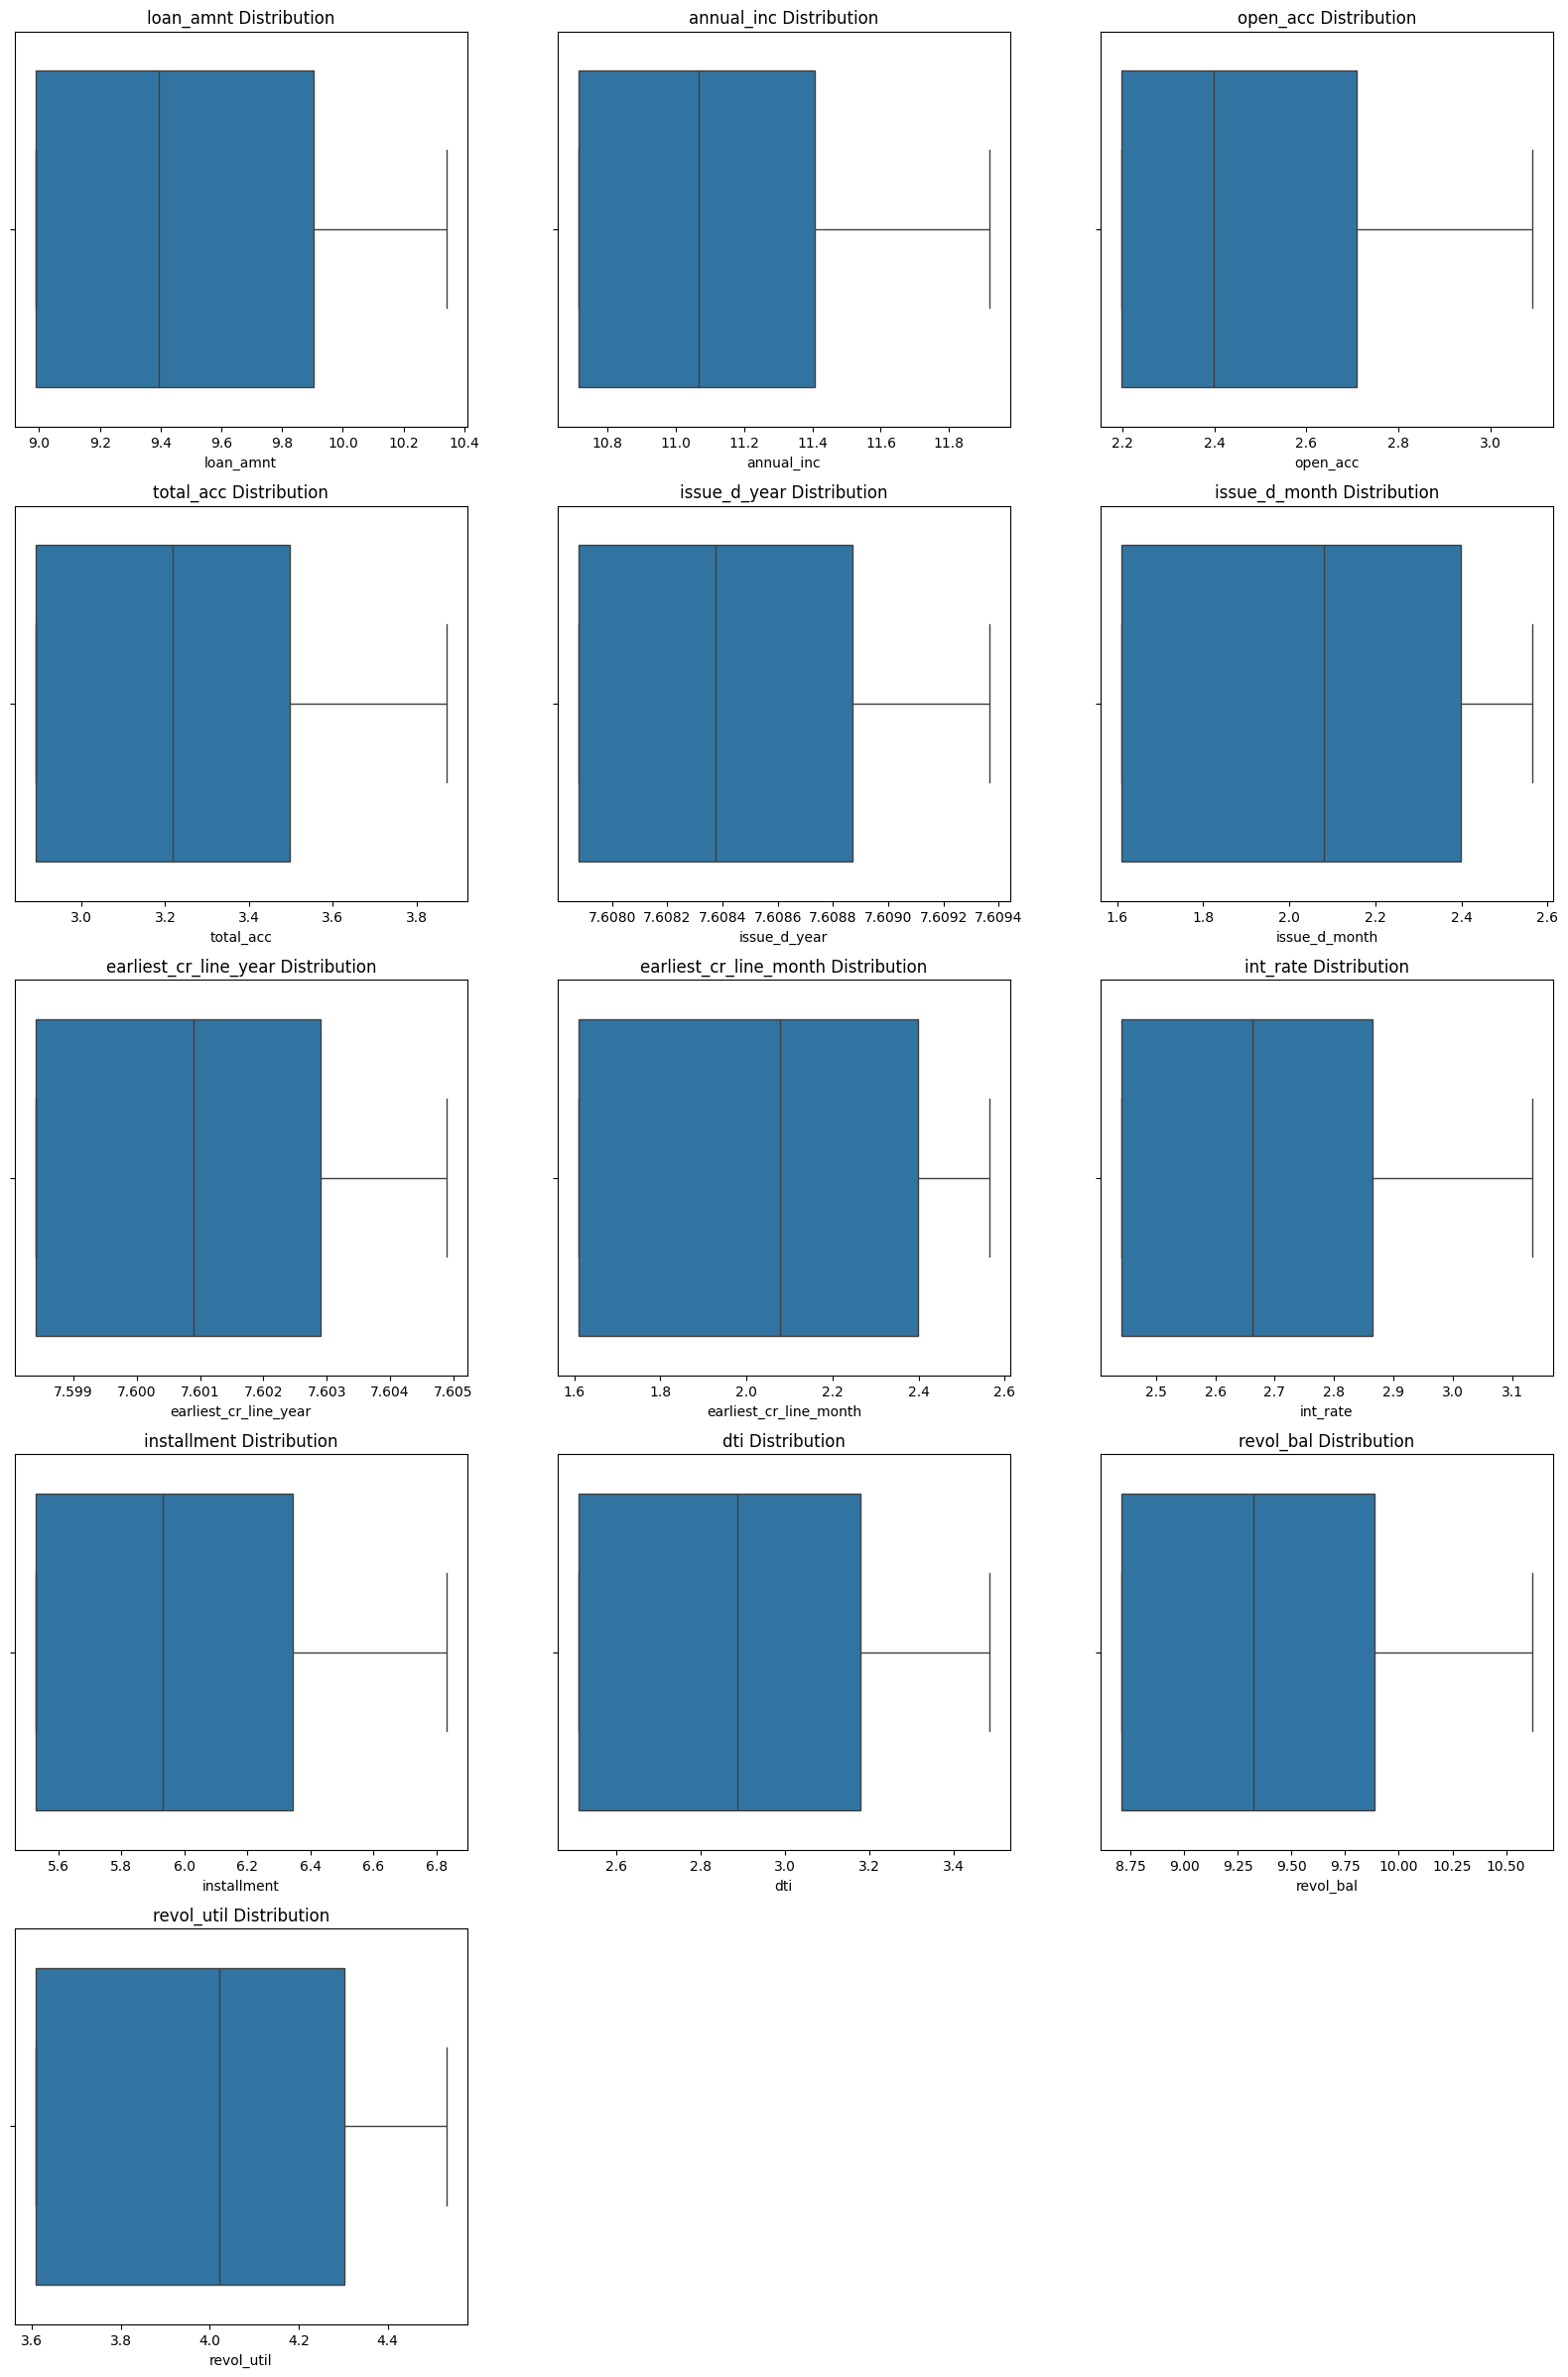

In [ ]:
# Box plot for the numeric columns
fig, ax = plt.subplots(5, 3, figsize=(20, 30))
for i, column in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    sns.boxplot(x=column, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'{column} Distribution')
# Removing the empty plots
ax[-1, -1].axis('off')
ax[-1, -2].axis('off')
plt.show()

## Data Pre-Processing and Model Building:

In [ ]:
# Label Encoding (For Ordinal & Binary Categorical Columns)
label_cols = ["term", "initial_list_status", "verification_status", "application_type",
              "grade", "emp_length", "sub_grade"]

# One-Hot Encoding (For Nominal Categorical Columns)
oneHot_cols = ["home_ownership", "purpose"]

# Target Encoding (For High-Cardinality Categorical Columns)
target_cols = ["zip_code"]

In [ ]:
# Label Encoding
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding
df = pd.get_dummies(df, columns=oneHot_cols)

In [ ]:
# Splitting the data into train and test
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_copy = X_train.copy()
X_train_copy['loan_status'] = y_train.astype('int')

target_mean = X_train_copy.groupby('zip_code')['loan_status'].mean()
X_train['zip_code'] = X_train['zip_code'].map(target_mean)
X_val['zip_code'] = X_val['zip_code'].map(target_mean)
X_test['zip_code'] = X_test['zip_code'].map(target_mean)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
print(f'Training Score: {log_reg.score(X_train_scaled, y_train)}')
print(f'Validation Score: {log_reg.score(X_val_scaled, y_val)}')

Training Score: 0.8887562267731478
Validation Score: 0.8884478532458291


In [ ]:
# Model's Coefficients
print(f'Model Coefficients: {log_reg.coef_}\nIntercept: {log_reg.intercept_}')

Model Coefficients: [[-1.53754115e-01 -1.67995227e-01  5.14753659e-02  2.96993296e-02
  -1.38628533e-02 -4.85048067e-01 -1.17381625e-02  2.22766618e-01
  -2.99509629e-02 -1.71675477e-01 -1.21057278e-01  6.59666106e-02
  -1.12647227e-01  8.55379442e-02  1.38714746e-02  1.83290434e-02
   3.65364946e-02 -5.62051900e-02  6.18914569e-02 -6.39230844e-02
   2.61750555e-02 -1.63296007e-03  1.50418134e-02  8.73386600e+00
   4.03581506e-02  5.69175119e-02 -9.55801581e-03 -3.28963691e-03
   9.33593113e-04 -5.85799532e-02  2.90357332e-02  1.77980967e-02
  -3.08808684e-03 -1.00850239e-02 -1.15294350e-02  1.67397948e-02
  -9.87212224e-05 -2.24052527e-02 -3.02715098e-03  3.05548997e-03
  -5.30627724e-03 -5.49909874e-02 -1.98347016e-03  2.37216892e-02]]
Intercept: [1.59316175]


Observations:
- Simple Logistic regression gives an accuracy of 0.88 on the test data as well as on the train data.

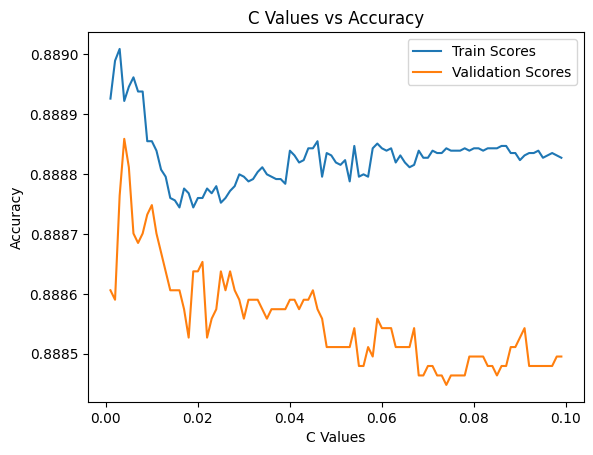

In [ ]:
# Hyperparameter Tuning
train_scores = []
val_scores = []
# C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_values = np.arange(0.001,0.1,0.001)
for c in C_values:
    log_reg = LogisticRegression(C=c, penalty='l2')
    log_reg.fit(X_train_scaled, y_train)
    train_scores.append(log_reg.score(X_train_scaled, y_train))
    val_scores.append(log_reg.score(X_val_scaled, y_val))

plt.plot(C_values, train_scores, label='Train Scores')
plt.plot(C_values, val_scores, label='Validation Scores')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('C Values vs Accuracy')
plt.legend()
plt.show()

In [ ]:
# Finding the best C value
best_c = C_values[np.argmax(val_scores)]
best_c

0.004

In [ ]:
# Final Model
log_reg = LogisticRegression(C=best_c, penalty='l2')
log_reg.fit(X_train_scaled, y_train)
print(f'Training Score: {log_reg.score(X_train_scaled, y_train)}')
print(f'Validation Score: {log_reg.score(X_val_scaled, y_val)}')
print(f'Test Score: {log_reg.score(X_test_scaled, y_test)}')

Training Score: 0.8889222740570887
Validation Score: 0.8888590179489206
Test Score: 0.8893401143666818


In [ ]:
# Feature Selection
log_reg = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
log_reg.fit(X_train_scaled, y_train)
print(f'Training Score: {log_reg.score(X_train_scaled, y_train)}')
print(f'Validation Score: {log_reg.score(X_val_scaled, y_val)}')
print(f'Test Score: {log_reg.score(X_test_scaled, y_test)}')
print(f'Coefficents: {log_reg.coef_}')

Training Score: 0.8889341345773701
Validation Score: 0.8886376215703329
Test Score: 0.8890997419158949
Coefficents: [[-8.81789668e-02 -1.64849164e-01  0.00000000e+00  0.00000000e+00
  -2.69667438e-03 -4.53056664e-01  0.00000000e+00  2.00348410e-01
  -2.18507427e-02 -1.62853551e-01 -7.16388453e-02  2.50251169e-02
  -7.69569434e-02  5.17261178e-02  0.00000000e+00  7.96035065e-03
   0.00000000e+00 -1.44003571e-02  6.07333291e-02 -5.63496445e-02
   1.61810222e-02  0.00000000e+00  2.69691982e-03  5.46250710e+00
   0.00000000e+00  4.83689697e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.27754027e-02  1.48095405e-02  7.41326635e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.26412992e-03
   0.00000000e+00 -9.19985786e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.29036729e-02  0.00000000e+00  9.99718176e-03]]


In [ ]:
# Printing the features with zero coefficients
zero_coef = X.columns[np.where(log_reg.coef_ == 0)[1]]
zero_coef

Index(['int_rate', 'installment', 'emp_length', 'initial_list_status',
       'pub_rec_bankruptcies_flag', 'earliest_cr_line_year',
       'home_ownership_ANY', 'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_vacation'],
      dtype='object')

In [ ]:
# Printing the features with non-zero coefficients
non_zero_coef = X.columns[np.where(log_reg.coef_ != 0)[1]]
non_zero_coef

Index(['loan_amnt', 'term', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'pub_rec_flag', 'mort_acc_flag',
       'issue_d_year', 'issue_d_month', 'earliest_cr_line_month', 'zip_code',
       'home_ownership_MORTGAGE', 'home_ownership_RENT', 'purpose_car',
       'purpose_credit_card', 'purpose_house', 'purpose_medical',
       'purpose_small_business', 'purpose_wedding'],
      dtype='object')

In [ ]:
X_train_final = X_train[non_zero_coef]
X_val_final = X_val[non_zero_coef]

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val_final)
X_test_scaled = scaler.transform(X_test[non_zero_coef])

# Model with selected features
log_reg = LogisticRegression(C=best_c, penalty='l2')
log_reg.fit(X_train_scaled, y_train)
print(f'Training Score: {log_reg.score(X_train_scaled, y_train)}')
print(f'Validation Score: {log_reg.score(X_val_scaled, y_val)}')
print(f'Test Score: {log_reg.score(X_test_scaled, y_test)}')

Training Score: 0.8889143670435676
Validation Score: 0.8887325057325848
Test Score: 0.889137695460756


## Model Evaluation:

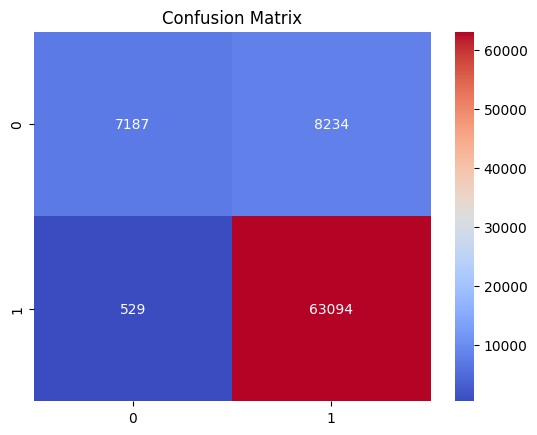

In [ ]:
# Confusion Matrix
y_pred = log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 7187,  8234],
       [  529, 63094]])

In [ ]:
# Sensitivity, Specificity, Precision, Recall, F1-Score
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

Sensitivity: 0.9916853967904689
Specificity: 0.4660527851630893
Precision: 0.8845614625392553
Recall: 0.9916853967904689
F1-Score: 0.9350653200050388


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     15421
           1       0.88      0.99      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



AUC Score: 0.904358621249488


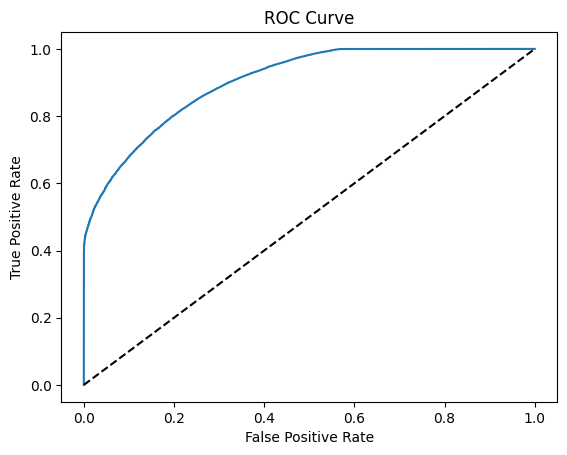

In [ ]:
# ROC Curve
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

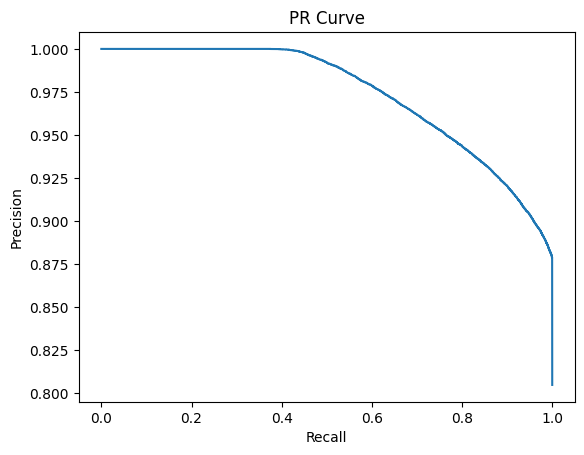

PR AUC Score: 0.9740911108889424


In [ ]:
# PR Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.show()

# PR AUC Score
pr_auc_score = auc(recall, precision)
print(f'PR AUC Score: {pr_auc_score}')

In [ ]:
# Best Threshold
best_threshold = thresholds[np.argmax(precision * recall)]
best_threshold

0.3998783665595594

Observations:
- Precision and Recall can be trade-off with the threshold value as per the business requirement.
- The best threshold value can be calculated using the above ROC curve.
- In this case, the threshold value is 0.3998 where the precision is very high and the recall is moderate.

Trade-off Questions:
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
<br>Ans: To reduce false positives and approve more borrowers, adjust the classification threshold slightly higher (e.g., 0.45–0.50 instead of 0.399) to make the model more cautious in predicting defaulters while maintaining a good balance between precision and recall.

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
<br>Ans: To reduce false negatives and avoid approving more defaulters, adjust the classification threshold slightly lower (e.g., 0.35–0.40 instead of 0.399) to make the model more lenient in predicting defaulters while maintaining a good balance between precision and recall.


## Questionaire:

In [ ]:
# What percentage of customers have fully paid their Loan Amount?
print(f'Percentage of customers who have fully paid their Loan Amount: {original_df["loan_status"].value_counts(normalize=True)[1]*100}')

Percentage of customers who have fully paid their Loan Amount: 19.61290811302174


In [ ]:
# Comment about the correlation between Loan Amount and Installment features.
print(f'Correlation between Loan Amount and Installment:')
original_df[["loan_amnt", "installment"]].corr()

Correlation between Loan Amount and Installment:


loan_amnt  installment
loan_amnt     1.000000     0.953929
installment   0.953929     1.000000

Observations:
- Very High Correlation between loan amount and installment.

In [ ]:
# The majority of people have home ownership as _______.
print(f'Majority of people have home ownership as: {original_df["home_ownership"].value_counts().idxmax()}')

Majority of people have home ownership as: MORTGAGE


In [ ]:
# People with grades ‘A’ are more likely to fully pay their loan. (T/F)
print(f'People with grades "A" are more likely to fully pay their loan: ')
print(original_df[original_df["grade"] == "A"]["loan_status"].value_counts(normalize=True)[0]*100)
print("Ans: True")


People with grades "A" are more likely to fully pay their loan: 
93.71212239238476
Ans: True


In [ ]:
# Name the top 2 afforded job titles.
print(f'Top 2 afforded job titles: {original_df["emp_title"].value_counts().head(2).index.tolist()}')

Top 2 afforded job titles: ['Teacher', 'Manager']


In [ ]:
# Thinking from a bank's perspective, which metric should our primary focus be on..
print(f'From a bank\'s perspective, the primary focus should be on: ')
print("Ans: From a bank's perspective, Recall should be the primary focus to catch real defaulters and minimize Non-Performing Assets (NPAs), ensuring fewer risky loans are approved. However, Precision is also important to avoid rejecting too many good borrowers. If a balance is needed, F1-score (harmonic mean of Precision & Recall) can be used.")

From a bank's perspective, the primary focus should be on: 
Ans: From a bank's perspective, Recall should be the primary focus to catch real defaulters and minimize Non-Performing Assets (NPAs), ensuring fewer risky loans are approved. However, Precision is also important to avoid rejecting too many good borrowers. If a balance is needed, F1-score (harmonic mean of Precision & Recall) can be used.


In [ ]:
# How does the gap in precision and recall affect the bank?
print(f'Gap in Precision and Recall affects the bank: ')
print("Ans: A gap in Precision and Recall affects the bank in the following ways:")
print("1. If the Recall is high and Precision is low, the bank will approve more risky loans, leading to higher NPAs.")
print("2. If the Precision is high and Recall is low, the bank will reject many good borrowers, leading to a loss of potential customers.")
print("3. If both Precision and Recall are low, the bank will approve more risky loans and reject good borrowers, leading to higher NPAs and loss of potential customers.")
print("4. If both Precision and Recall are high, the bank will approve fewer risky loans and reject fewer good borrowers, leading to lower NPAs and loss of potential customers.")
print("5. To minimize the gap in Precision and Recall, the bank can use F1-score, which is the harmonic mean of Precision and Recall.")

Gap in Precision and Recall affects the bank: 
Ans: A gap in Precision and Recall affects the bank in the following ways:
1. If the Recall is high and Precision is low, the bank will approve more risky loans, leading to higher NPAs.
2. If the Precision is high and Recall is low, the bank will reject many good borrowers, leading to a loss of potential customers.
3. If both Precision and Recall are low, the bank will approve more risky loans and reject good borrowers, leading to higher NPAs and loss of potential customers.
4. If both Precision and Recall are high, the bank will approve fewer risky loans and reject fewer good borrowers, leading to lower NPAs and loss of potential customers.
5. To minimize the gap in Precision and Recall, the bank can use F1-score, which is the harmonic mean of Precision and Recall.


In [ ]:
# Which were the features that heavily affected the outcome?
print(f'Features that heavily affected the outcome: ')
print("Ans: As per the Logistic Regression Model with L1 Regularization, ")
print("The features that heavily affected the outcome are likely dti (Debt-to-Income Ratio), revol_util (Credit Utilization), annual_inc (Income), grade, and sub_grade, as they directly impact a borrower's ability to repay. Additionally, loan-specific factors like loan_amnt, term, and verification_status play a major role. The presence of pub_rec_flag (Public Records) and mort_acc_flag (Mortgage Accounts) suggests that past credit behavior significantly influences loan default risk.")


Features that heavily affected the outcome: 
Ans: As per the Logistic Regression Model with L1 Regularization, 
The features that heavily affected the outcome are likely dti (Debt-to-Income Ratio), revol_util (Credit Utilization), annual_inc (Income), grade, and sub_grade, as they directly impact a borrower's ability to repay. Additionally, loan-specific factors like loan_amnt, term, and verification_status play a major role. The presence of pub_rec_flag (Public Records) and mort_acc_flag (Mortgage Accounts) suggests that past credit behavior significantly influences loan default risk.


In [ ]:
# Will the results be affected by geographical location? (Yes/No)
print(f'Results be affected by geographical location: ')
print("Ans: Yes, the results can be affected by geographical location. The zip_code feature, which represents the geographical location of the borrower, can impact loan default rates. Different regions may have varying economic conditions, employment opportunities, and borrower profiles, leading to differences in loan repayment behavior. Target encoding the zip_code feature can capture such regional variations and improve the model's predictive power.")

Results be affected by geographical location: 
Ans: Yes, the results can be affected by geographical location. The zip_code feature, which represents the geographical location of the borrower, can impact loan default rates. Different regions may have varying economic conditions, employment opportunities, and borrower profiles, leading to differences in loan repayment behavior. Target encoding the zip_code feature can capture such regional variations and improve the model's predictive power.
